### Problem 1: Linear Regression


You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

### Data Dictionary:

Variable Name  | Description
-------------  | -------------
Carat          | Carat weight of the cubic zirconia.
Cut            | Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
Color          | Colour of the cubic zirconia.With D being the worst and J the best.
Clarity        | cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Worst to Best) IF, VVS1, VVS2, VS1,                    VS2, Sl1, Sl2, l1
Depth          | The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
Table          | The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
Price          | The Price of the cubic zirconia.
X              | Length of the cubic zirconia in mm.
Y              | Width of the cubic zirconia in mm.
Z              | Height of the cubic zirconia in mm.

   

#### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

#### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

#### 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

#### 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

***1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.***

In [1]:
# Importing the required libraries

import numpy as np   
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import pandas as pd    
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

In [2]:
os.getcwd()

'/home/jovyan/demo'

In [3]:
# importing and reading the dataset

lg=pd.read_csv("/home/jovyan/demo/cubic_zirconia.csv")
#checking the first 10 rows of the dataset
lg.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [4]:
# checking the shape and datatype information
print(f'Shape of the datset is {lg.shape}')
print("--------------")
print(lg.info())

Shape of the datset is (26967, 11)
--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB
None


In [5]:
lg.select_dtypes(include='object').columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [6]:
## Observations : There are 26967 rows in the dataset, seems there are null values in the dataset, verifying the null values below
## There are 3 columns which have Object datatype, these needs to be chnaged to numerical

for col1 in lg.columns:
    if lg[col1].isnull().sum()!=0:
        print(f"{col1}: {lg[col1].isnull().sum()}: {round(lg[col1].isnull().mean()*100,2)}%")

depth: 697: 2.58%


In [7]:
# The column depth has 697 null values which is below 3%

In [8]:
# Checking the Duplicate values

lg.duplicated().sum()

0

In [9]:
# No duplicate values found

In [10]:
# Checking the unique values of the Object data types

object_values = []
for col in lg.select_dtypes(include='object').columns:
    object_values.append((col, lg[col].nunique()))
object_values = sorted(object_values, key=lambda x: x[1],reverse = True)
print("Unique values in each column are as follows\n")
for col,nunique in object_values:
    print(f"{col}: {nunique}: {lg[col].unique()}")



Unique values in each column are as follows

clarity: 8: ['SI1' 'IF' 'VVS2' 'VS1' 'VVS1' 'VS2' 'SI2' 'I1']
color: 7: ['E' 'G' 'F' 'D' 'H' 'J' 'I']
cut: 5: ['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']


In [11]:
lg['clarity'].value_counts(normalize=True)

SI1     0.243668
VS2     0.226165
SI2     0.169652
VS1     0.151778
VVS2    0.093855
VVS1    0.068194
IF      0.033152
I1      0.013535
Name: clarity, dtype: float64

In [12]:
lg['color'].value_counts(normalize=True)

G    0.209923
E    0.182334
F    0.175362
H    0.152112
D    0.124003
I    0.102755
J    0.053510
Name: color, dtype: float64

In [13]:
lg['cut'].value_counts(normalize=True)

Ideal        0.401083
Premium      0.255831
Very Good    0.223607
Good         0.090518
Fair         0.028961
Name: cut, dtype: float64

In [14]:
# Checking the statistical description of the dataset
lg.describe(include='all')

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,13484.000000,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


In [15]:
col2 = ['x','y','z']
for k in col2:
    print(f'Count of 0 values in Column {k} is {lg[lg[k]==0][k].count()}')
        

Count of 0 values in Column x is 3
Count of 0 values in Column y is 3
Count of 0 values in Column z is 9


In [16]:
# There are 0 values in the dataset for the columns x, y,z which can be removed as the no. of rows are negligible
# The scale of columns depth and table are different from other columns
# The distribution of y,z and Price seems right skewed
# There does not seems to be any junk values in the columns

In [17]:
# checking the skewness
lg.skew()

Unnamed: 0    0.000000
carat         1.116481
depth        -0.028618
table         0.765758
x             0.387986
y             3.850189
z             2.568257
price         1.618550
dtype: float64

In [18]:
# As seen above the columns Carat,y,z and Price are highly skewed

### Univariate Analysis

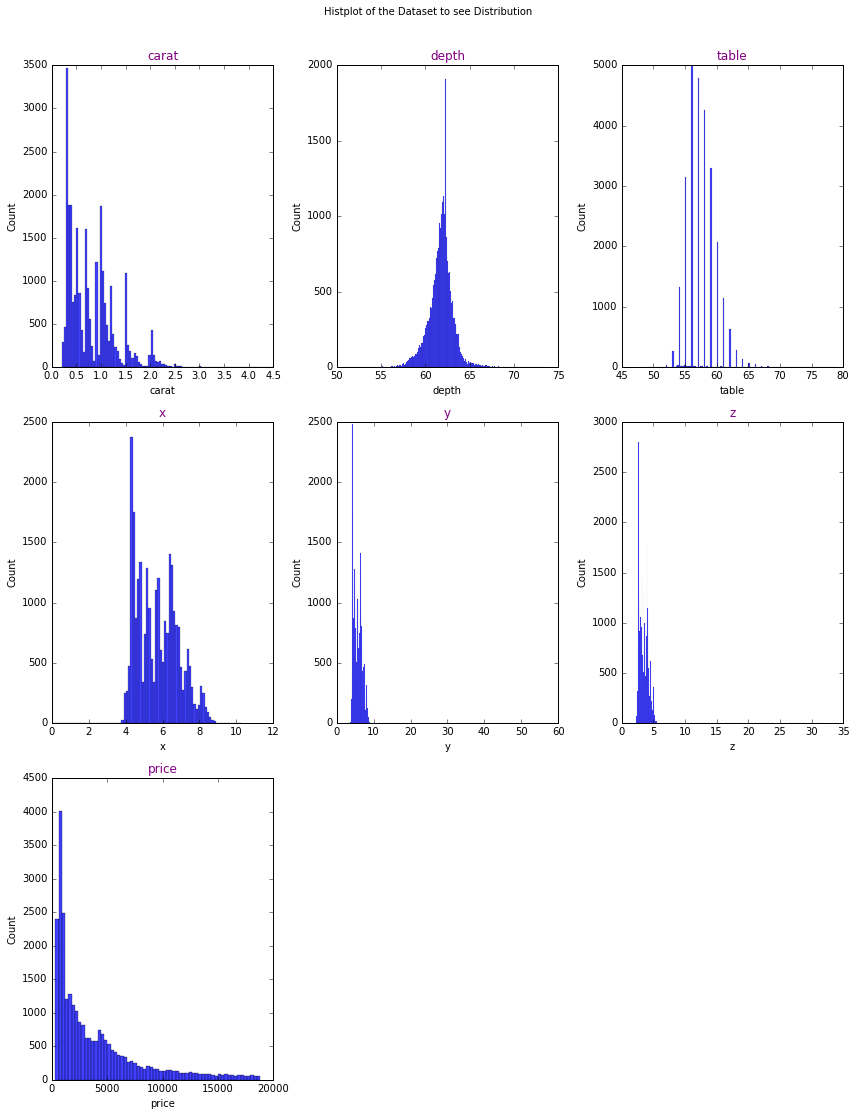

In [19]:


# Plotting Histplot to see if there are any outlier in any of the Columns
# Excluding the Unnamed Column
lg1 = lg.iloc[:, 1:]
fig=plt.figure(figsize=(12,15))
fig.suptitle('Histplot of the Dataset to see Distribution', y=1.03)
for i in range(0,lg1.select_dtypes(exclude='object').shape[1]):
    ax=fig.add_subplot(3,3,i+1)
    sns.histplot(lg1[lg1.select_dtypes(exclude='object').columns[i]])
    ax.set_title(lg1.select_dtypes(exclude='object').columns[i], color='purple')
    
plt.tight_layout()
plt.show()

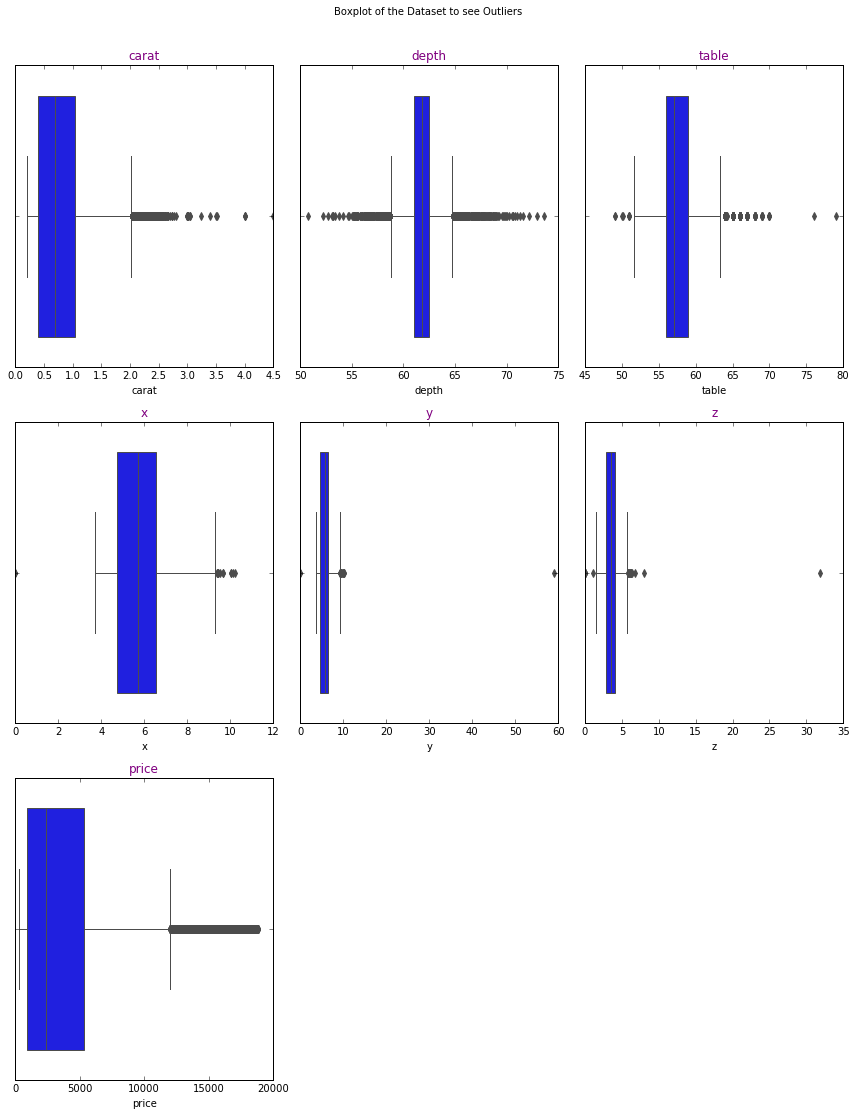

In [20]:
# Plotting Boxplot to see if there are any outlier in any of the Columns

fig=plt.figure(figsize=(12,15))
fig.suptitle('Boxplot of the Dataset to see Outliers', y=1.03)
for i in range(0,lg1.select_dtypes(exclude='object').shape[1]):
    ax=fig.add_subplot(3,3,i+1)
    sns.boxplot(lg1[lg1.select_dtypes(exclude='object').columns[i]])
    ax.set_title(lg1.select_dtypes(exclude='object').columns[i], color='purple')
    
plt.tight_layout()
plt.show()


In [21]:
# We can see that the variables Carat, y, z and target variable price are highly skewed with Outliers. Even from boxplot it is evident that all variables 
# have outliers with large outlier values for y,z and Price

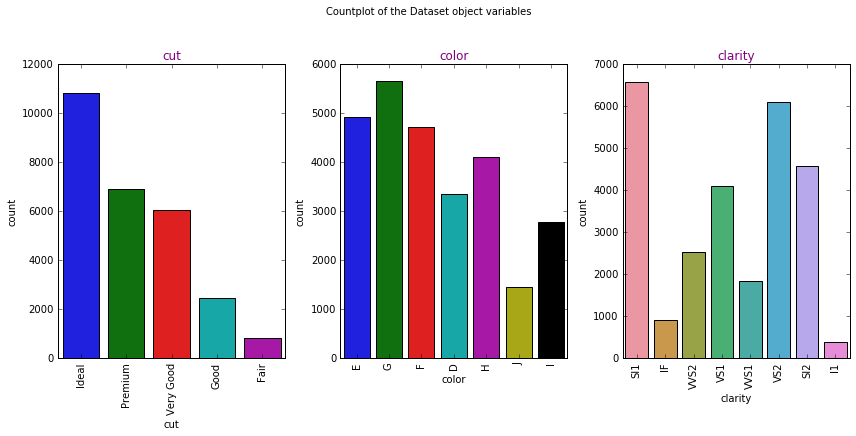

In [22]:
# Univariate analysis of the Categorical variable

fig=plt.figure(figsize=(12,15))
fig.suptitle('Countplot of the Dataset object variables', y=1.03)
for i in range(0,lg1.select_dtypes(include='object').shape[1]):
    ax=fig.add_subplot(3,3,i+1)
    sns.countplot(lg1[lg1.select_dtypes(include='object').columns[i]])
    plt.xticks(rotation=90)
    ax.set_title(lg1.select_dtypes(include='object').columns[i], color='purple')
    
plt.tight_layout()
plt.show()


In [23]:
# We see that Ideal cut has the larget share followed by Premium and Fair has the minimum counts.
# The color G has the larget share followed by E and J has the minimum count
# The clarity value of SI1 has the largest share followed by VS2. I2 has the minimum count

### Bivariate Analysis

In [24]:
# Using Bivariate Analysis between the variables
# Starting with Target Variable versus the indpendent variables with numeric datatype



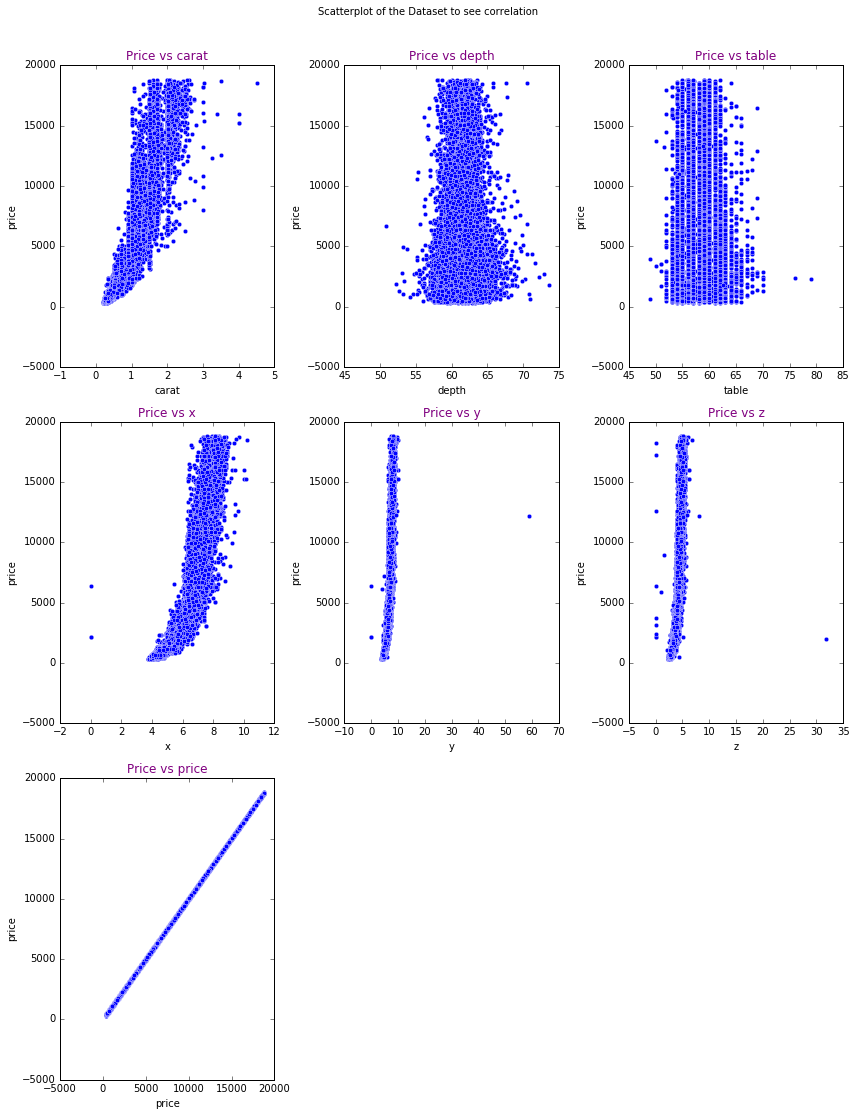

In [25]:
fig=plt.figure(figsize=(12,15))
fig.suptitle('Scatterplot of the Dataset to see correlation', y=1.03)
for i in range(0,lg1.select_dtypes(exclude='object').shape[1]):
    ax=fig.add_subplot(3,3,i+1)
    sns.scatterplot(y=lg1['price'], x=lg1[lg1.select_dtypes(exclude='object').columns[i]], data=lg1)
    ax.set_title('Price vs {}'.format(lg1.select_dtypes(exclude='object').columns[i]), color='purple')
    
plt.tight_layout()
plt.show()

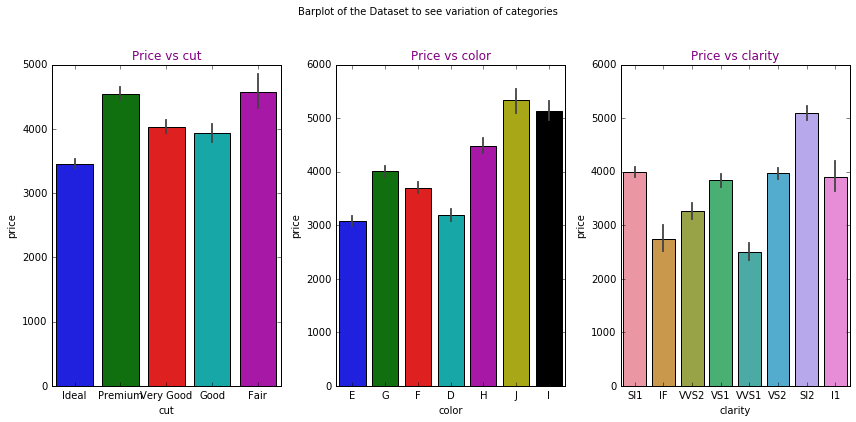

In [26]:
# Bivariate analysis of the Categorical variable
fig=plt.figure(figsize=(12,15))
fig.suptitle('Barplot of the Dataset to see variation of categories', y=1.03)
for i in range(0,lg1.select_dtypes(include='object').shape[1]):
    ax=fig.add_subplot(3,3,i+1)
    sns.barplot(y=lg1['price'], x=lg1[lg1.select_dtypes(include='object').columns[i]], data=lg1)
    ax.set_title('Price vs {}'.format(lg1.select_dtypes(include='object').columns[i]), color='purple')
    
plt.tight_layout()
plt.show()

In [27]:
lg1.groupby('cut')['price'].mean().sort_values()

cut
Ideal        3454.119730
Good         3930.581729
Very Good    4034.462852
Premium      4548.263806
Fair         4579.248399
Name: price, dtype: float64

In [28]:
lg1.groupby('color')['price'].mean().sort_values()

color
E    3073.946715
D    3185.961423
F    3699.880313
G    4002.694400
H    4486.713554
I    5129.830386
J    5331.453915
Name: price, dtype: float64

In [29]:
lg1.groupby('clarity')['price'].mean().sort_values()

clarity
VVS1    2502.874388
IF      2734.222595
VVS2    3265.279336
VS1     3838.876130
I1      3906.547945
VS2     3968.759961
SI1     3998.155228
SI2     5095.000437
Name: price, dtype: float64

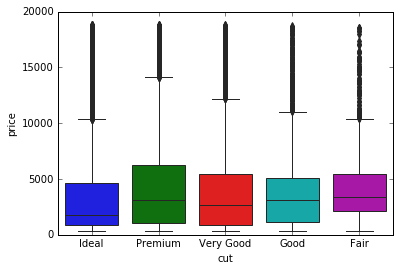

In [30]:
# Boxplot of Categorical variables against prices

sns.boxplot(y = lg1['price'], x=lg1['cut'])

    

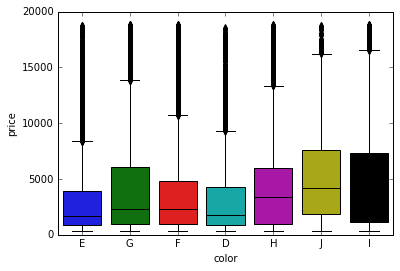

In [31]:
sns.boxplot(y = lg1['price'], x=lg1['color'])

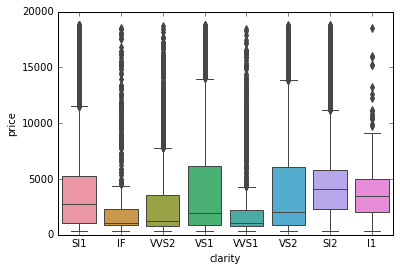

In [32]:
sns.boxplot(y = lg1['price'], x=lg1['clarity'])

#### 1.There seems a postive correlation between Price and  Carat, Length, Width and Height of the cubic zirconia 
#### 2.From the bar graph of categorical variable it seems that mean price of cut = Fair is highest and that of Ideal is minimum. The distribution of prices of Good and Fair seems similar which can be merged together.
#### 3.Color J has the highest mean prices and Color E has minimum price. The distribution of prices of I:J and E:D seems similar which can be merged together.
#### 4.Clarity S12 has the highest mean prices and Clarity VVS1 has minimum price. The distribution of prices of IF:VVS1 seems similar which can be merged together.

### Multivariate Analysis

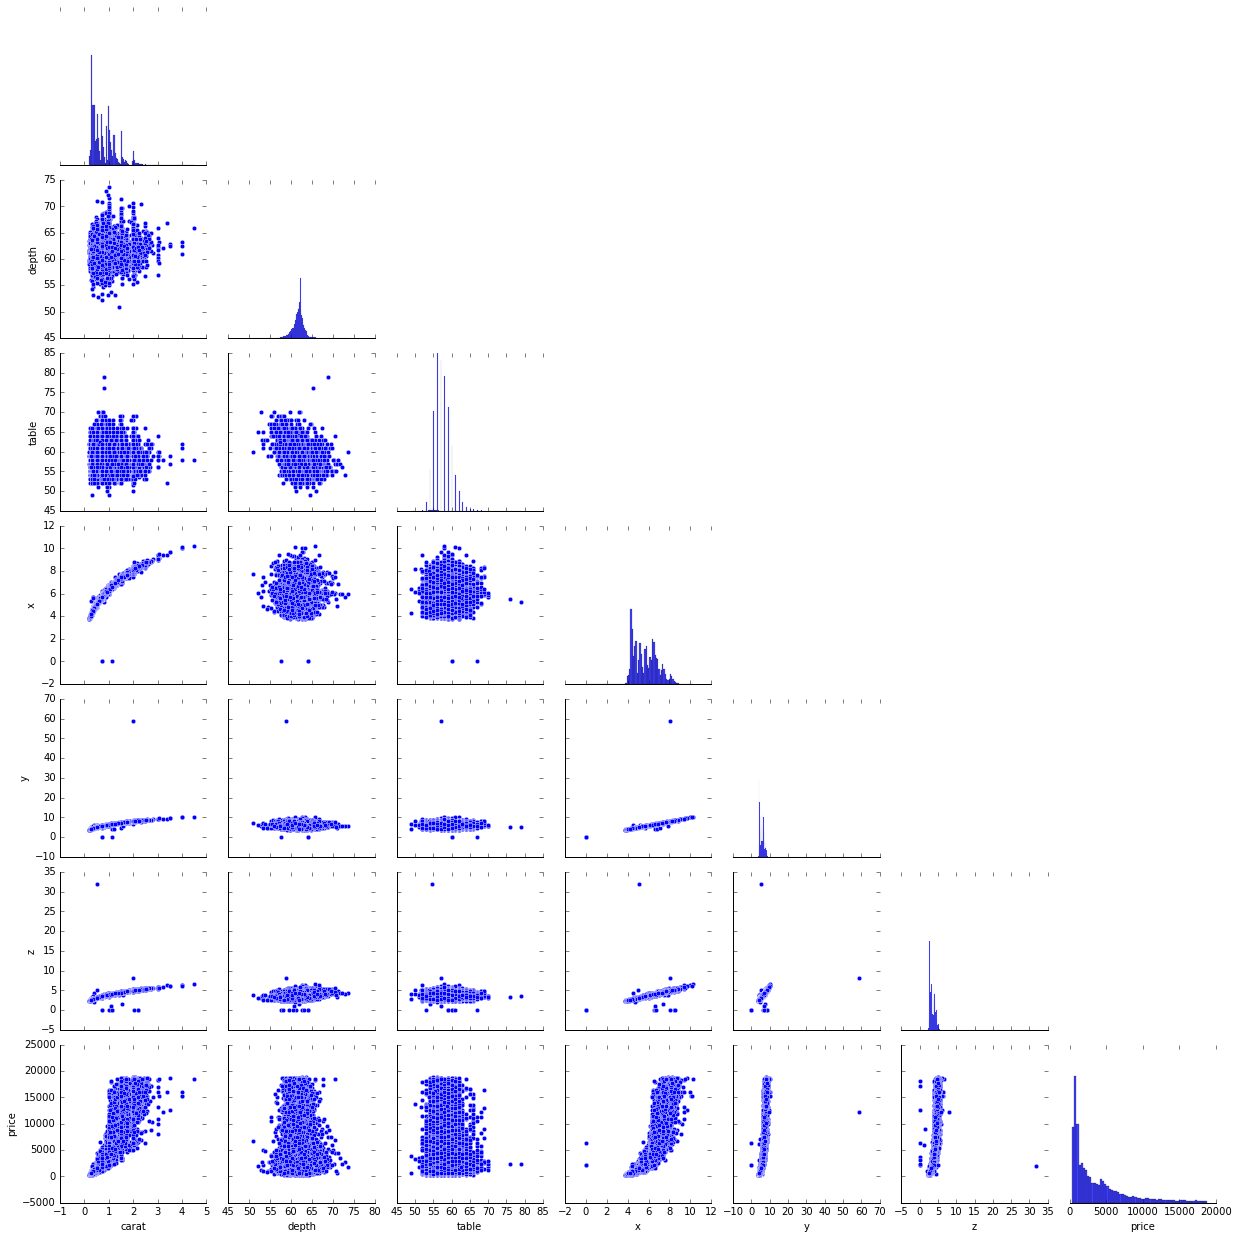

In [33]:
# Plotting a pair plot to see correlation among variables

sns.pairplot(lg1, corner=1)

In [34]:
# plotting the correlation matrix
lg_corr = lg1.corr()
lg_corr


,carat,depth,table,x,y,z,price
carat,1.000000,0.035364,0.181685,0.976368,0.941071,0.940640,0.922416
depth,0.035364,1.000000,-0.298011,-0.018715,-0.024735,0.101624,-0.002569
table,0.181685,-0.298011,1.000000,0.196206,0.182346,0.148944,0.126942
x,0.976368,-0.018715,0.196206,1.000000,0.962715,0.956606,0.886247
y,0.941071,-0.024735,0.182346,0.962715,1.000000,0.928923,0.856243
z,0.940640,0.101624,0.148944,0.956606,0.928923,1.000000,0.850536
price,0.922416,-0.002569,0.126942,0.886247,0.856243,0.850536,1.000000


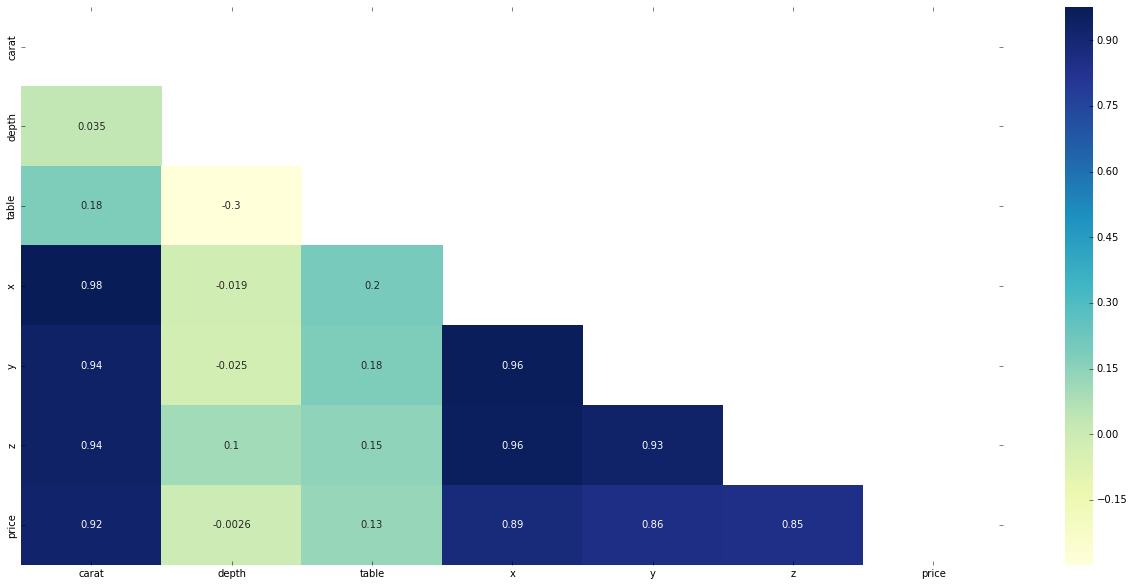

In [35]:

mask= np.triu(np.ones_like(lg1.corr(), dtype=np.bool)) 
plt.figure(figsize=(22, 10))
sns.heatmap(lg1.corr(), annot=True, cmap='YlGnBu', mask=mask,)

In [36]:
# Unstacking the rows and columns to view the correlated variables
lg_corr=pd.DataFrame(lg_corr.unstack().sort_values()).reset_index()

In [37]:
lg_corr.rename(columns={'level_0':'Var1','level_1':'Var2',0:'Corr_Coeff'}, inplace=True)

In [38]:

#Excluding the similar variables and mirror variables
lg_corr = lg_corr[lg_corr['Var1']!=lg_corr['Var2']]
lg_corr['redundant_col']=lg_corr.apply(lambda x: '-'.join(sorted([x['Var1'],x['Var2']])),axis=1)
lg_corr = lg_corr.drop_duplicates(['redundant_col'])
lg_corr.sort_values(by='Corr_Coeff', ascending=False).reset_index(drop=True)

,Var1,Var2,Corr_Coeff,redundant_col
0,x,carat,0.976368,carat-x
1,x,y,0.962715,x-y
2,x,z,0.956606,x-z
3,carat,y,0.941071,carat-y
4,z,carat,0.940640,carat-z
5,y,z,0.928923,y-z
6,price,carat,0.922416,carat-price
7,price,x,0.886247,price-x
8,price,y,0.856243,price-y
9,z,price,0.850536,price-z


In [39]:
# Checking the collinearity using Variance Inflation Factor

In [40]:
X = lg1.drop('price',axis=1)
X.dropna(axis=0, how='any',inplace=True)

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.select_dtypes(exclude='object').values, ix) for ix in range(X.select_dtypes(exclude='object').shape[1])] 

i=0
for column in X.select_dtypes(exclude='object').columns:
    if i < 6:
        print (column ,"--->",  vif[i])
        i = i+1


carat ---> 76.30541308490696
depth ---> 644.2597276505643
table ---> 567.3306178640847
x ---> 1583.4702308684184
y ---> 351.01555530783884
z ---> 1414.1877547898703


#### There is a high correlation between carat-x, x-y, x-z, carat-y, carat-z, y-z

***1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.***

#### Imputing the null values and handling the rows with zero values

In [42]:

# We have seen that the column-depth has null values, as depth is a numeric variable with outliers so imputing it with the median value

lg1.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [43]:
h=lg1.select_dtypes(include='object')
h['test']=1
h.head()

,cut,color,clarity,test
0,Ideal,E,SI1,1
1,Premium,G,IF,1
2,Very Good,E,VVS2,1
3,Ideal,F,VS1,1
4,Ideal,F,VVS1,1


In [44]:
# imputing the missing values with the median as we have outliers in the dataset
from sklearn.impute import SimpleImputer
SI = SimpleImputer(strategy='median')
lg2 = pd.DataFrame(SI.fit_transform(lg1.select_dtypes(exclude='object')),columns=lg1.select_dtypes(exclude='object').columns)


In [45]:
lg2.head()

,carat,depth,table,x,y,z,price
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0


In [46]:

lg_object=lg1.select_dtypes(include='object')



In [47]:

lg_object.head()

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1


In [48]:
lg2 = pd.concat([lg2, lg_object], axis=1, join='inner')
lg2.head()

,carat,depth,table,x,y,z,price,cut,color,clarity
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,Ideal,E,SI1
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0,Premium,G,IF
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,Very Good,E,VVS2
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,Ideal,F,VS1
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0,Ideal,F,VVS1


In [49]:
lg2.isnull().sum()

carat      0
depth      0
table      0
x          0
y          0
z          0
price      0
cut        0
color      0
clarity    0
dtype: int64

In [50]:
# The null values have been imputed

In [51]:
# Handling the rows with value = 0 

col_0 = list(lg2.columns)
for k in col_0:
    print(f'Count of 0 values in Column {k} is {lg2[lg2[k]==0][k].count()}')
        

Count of 0 values in Column carat is 0
Count of 0 values in Column depth is 0
Count of 0 values in Column table is 0
Count of 0 values in Column x is 3
Count of 0 values in Column y is 3
Count of 0 values in Column z is 9
Count of 0 values in Column price is 0
Count of 0 values in Column cut is 0
Count of 0 values in Column color is 0
Count of 0 values in Column clarity is 0


In [52]:
# Getting the rows with zero values in x, y, z

lg2[(lg2['x'] == 0) | (lg2['y'] == 0) | (lg2['z'] == 0)]

,carat,depth,table,x,y,z,price,cut,color,clarity
5821,0.71,64.1,60.0,0.00,0.00,0.0,2130.0,Good,F,SI2
6034,2.02,62.7,53.0,8.02,7.95,0.0,18207.0,Premium,H,VS2
6215,0.71,64.1,60.0,0.00,0.00,0.0,2130.0,Good,F,SI2
10827,2.20,61.2,59.0,8.42,8.37,0.0,17265.0,Premium,H,SI1
12498,2.18,59.4,61.0,8.49,8.45,0.0,12631.0,Premium,H,SI2
12689,1.10,63.0,59.0,6.50,6.47,0.0,3696.0,Premium,G,SI2
17506,1.14,57.5,67.0,0.00,0.00,0.0,6381.0,Fair,G,VS1
18194,1.01,58.1,59.0,6.66,6.60,0.0,3167.0,Premium,H,I1
23758,1.12,60.4,59.0,6.71,6.67,0.0,2383.0,Premium,G,I1


In [53]:
# Since the count of rows with value=0 is very less, we can drop them
lg3 = lg2[(lg2['x'] > 0) & (lg2['y'] > 0) & (lg2['z'] > 0)]


In [54]:
col_1 = list(lg3.columns)
for k in col_1:
    print(f'Count of 0 values in Column {k} is {lg3[lg3[k]==0][k].count()}')

Count of 0 values in Column carat is 0
Count of 0 values in Column depth is 0
Count of 0 values in Column table is 0
Count of 0 values in Column x is 0
Count of 0 values in Column y is 0
Count of 0 values in Column z is 0
Count of 0 values in Column price is 0
Count of 0 values in Column cut is 0
Count of 0 values in Column color is 0
Count of 0 values in Column clarity is 0


In [55]:
# No rows with zero values and null values in the new dataset lg3
lg3.isnull().sum().any()

False

In [56]:
lg3.min()

carat        0.2
depth       50.8
table       49.0
x           3.73
y           3.71
z           1.07
price      326.0
cut         Fair
color          D
clarity       I1
dtype: object

####  Combining sub-levels
####  As we have seen above that for the categorical variable - cut, color and clarity, below sub-levels distribution of prices are similar and can be merged together 
#### 1. Cut:- The distribution of prices of Good and Fair seems similar which can be merged.
#### 2.Color: The distribution of prices of I:J and E:D seems similar which can be merged.
#### 3.Clarity :- The distribution of prices of IF:WS1 seems similar which can be merged.

In [57]:
lg3.head()

,carat,depth,table,x,y,z,price,cut,color,clarity
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,Ideal,E,SI1
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0,Premium,G,IF
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,Very Good,E,VVS2
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,Ideal,F,VS1
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0,Ideal,F,VVS1


<Figure size 1440x1440 with 0 Axes>

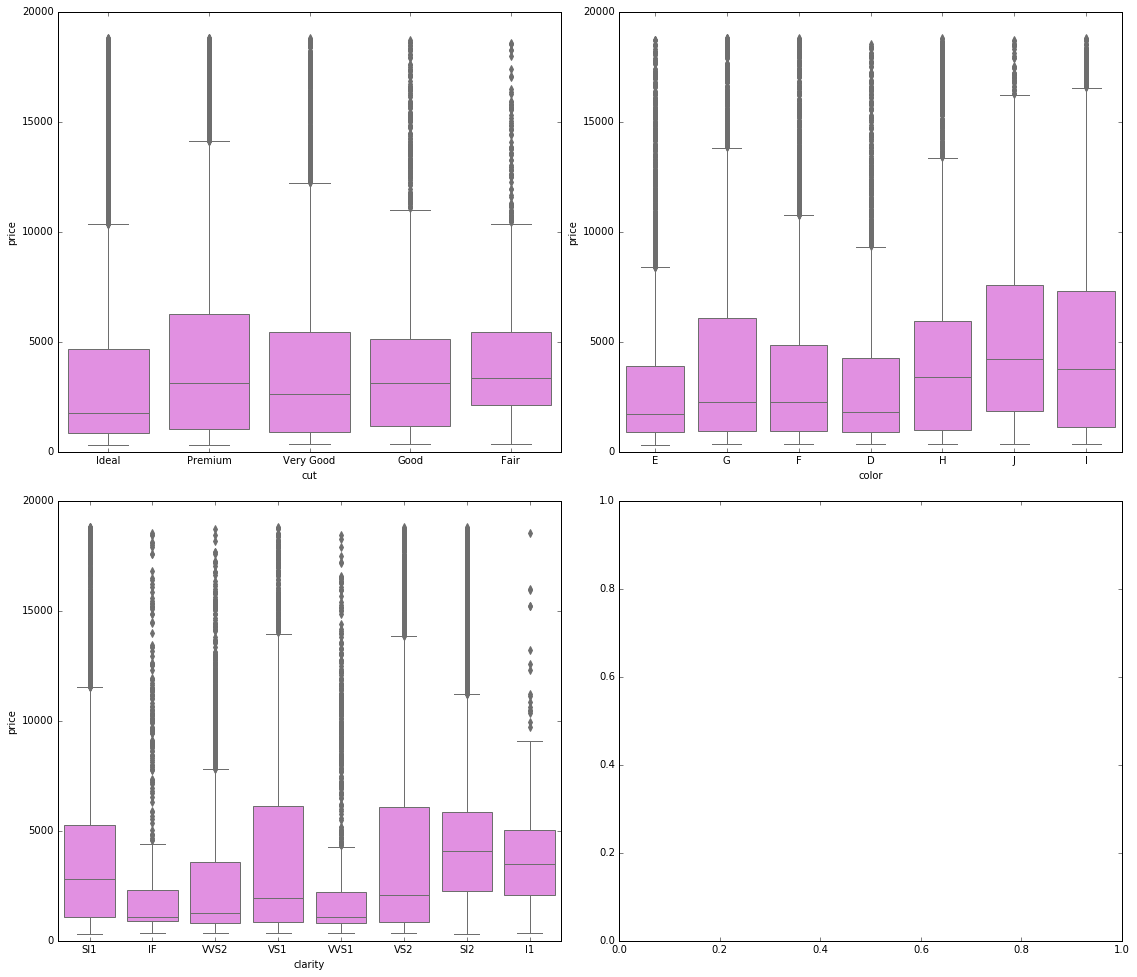

In [58]:
fig=plt.figure(figsize=(20,20))
fig, axes = plt.subplots(2, 2, figsize=(16, 14), sharey=False, sharex=False)
fig.tight_layout(pad=3.0)
sns.boxplot(ax = axes[0, 0], x= lg3['cut'], y=lg3['price'], color = 'violet',data = lg3)
sns.boxplot(ax = axes[0, 1], x= lg3['color'], y=lg3['price'], color = 'violet',data = lg3)
sns.boxplot(ax = axes[1, 0], x= lg3['clarity'], y=lg3['price'], color = 'violet',data = lg3)

In [59]:
# Combining the sub-levels as discussed above
# 1.Cut:- The distribution of prices of Good and Fair seems similar which can be merged together.
# 2.Color: The distribution of prices of I:J and E:D seems similar which can be merged together.
# 3.Clarity :- The distribution of prices of IF:VVS1 seems similar which can be merged together.

In [60]:
lg3['cut'] = np.where(lg3['cut']=='Good','Fair',lg3['cut'])
lg3['color'] = np.where(lg3['color']=='I','J',lg3['color'])
lg3['color'] = np.where(lg3['color']=='E','D',lg3['color'])
lg3['clarity'] = np.where(lg3['clarity']=='IF','VVS1',lg3['clarity'])

In [61]:
#Checking the unique categories now after merging the sublevels

object_values1 = []
for col in lg3.select_dtypes(include='object').columns:
    object_values1.append((col, lg3[col].nunique()))
object_values1 = sorted(object_values1, key=lambda x: x[1],reverse = True)
print("Unique values in each column are as follows\n")
for col,nunique in object_values1:
    print(f"{col}: {nunique}: {lg3[col].unique()}")

Unique values in each column are as follows

clarity: 7: ['SI1' 'VVS1' 'VVS2' 'VS1' 'VS2' 'SI2' 'I1']
color: 5: ['D' 'G' 'F' 'H' 'J']
cut: 4: ['Ideal' 'Premium' 'Very Good' 'Fair']


***1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning***

##### Encoding the data for Modelling

##### As all the 3 categorical variables have Ordinal values, we would use Ordinal encoder

##### -Cut	 Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
##### -Color 	 Colour of the cubic zirconia.With D being the worst and J the best.
##### -Clarity	 cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Worst to Best) IF, VVS1, VVS2, VS1,VS2, Sl1, Sl2, l1

#####  The order of sub-levels for Cut, Color and Clarify as per Data dictionary and merged sub-levels are as follows :

##### Cut : {"Fair":0,"Very Good":1,"Premium":2,"Ideal":3}
##### Color : {"D":0,"F":1,"G":2,"H":3,"J":4}
##### Clarify : {"VVS1":0,"VVS2":1,"VS1":2,"VS2":3,"SI1":4,"SI2":5, "I1:6"}

In [62]:
from sklearn.preprocessing import OrdinalEncoder
ord_encoder_cut = OrdinalEncoder(categories=[['Fair', 'Very Good', 'Premium', 'Ideal']])
ord_encoder_color = OrdinalEncoder(categories=[["D","F","G","H","J"]])
ord_encoder_clarity = OrdinalEncoder(categories=[["VVS1","VVS2","VS1","VS2","SI1","SI2", "I1"]])

In [63]:
print(ord_encoder_cut.fit(lg3[['cut']]))
print(ord_encoder_color.fit(lg3[['color']]))
print(ord_encoder_clarity.fit(lg3[['clarity']]))

OrdinalEncoder(categories=[['Fair', 'Very Good', 'Premium', 'Ideal']],
               dtype=<class 'numpy.float64'>)
OrdinalEncoder(categories=[['D', 'F', 'G', 'H', 'J']],
               dtype=<class 'numpy.float64'>)
OrdinalEncoder(categories=[['VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']],
               dtype=<class 'numpy.float64'>)


In [64]:
lg3['cut_enc'] = ord_encoder_cut.transform(lg3[['cut']]) .reshape(1,-1)[0]
lg3['color_enc'] = ord_encoder_color.transform(lg3[['color']]) .reshape(1,-1)[0]
lg3['clarity_enc'] = ord_encoder_clarity.transform(lg3[['clarity']]) .reshape(1,-1)[0]

In [65]:
lg3['cut_enc'].unique()

array([3., 2., 1., 0.])

In [66]:
lg3['color_enc'].unique()

array([0., 2., 1., 3., 4.])

In [67]:
lg3['clarity_enc'].unique()

array([4., 0., 1., 2., 3., 5., 6.])

In [68]:
lg3.head()

,carat,depth,table,x,y,z,price,cut,color,clarity,cut_enc,color_enc,clarity_enc
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,Ideal,D,SI1,3.0,0.0,4.0
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0,Premium,G,VVS1,2.0,2.0,0.0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,Very Good,D,VVS2,1.0,0.0,1.0
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,Ideal,F,VS1,3.0,1.0,2.0
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0,Ideal,F,VVS1,3.0,1.0,0.0


In [69]:
lg4 = lg3.drop(['cut','color','clarity'],axis=1)

In [70]:
lg4.head()

,carat,depth,table,x,y,z,price,cut_enc,color_enc,clarity_enc
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,3.0,0.0,4.0
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0,2.0,2.0,0.0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,1.0,0.0,1.0
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,3.0,1.0,2.0
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0,3.0,1.0,0.0


In [71]:
lg4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26958 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        26958 non-null  float64
 1   depth        26958 non-null  float64
 2   table        26958 non-null  float64
 3   x            26958 non-null  float64
 4   y            26958 non-null  float64
 5   z            26958 non-null  float64
 6   price        26958 non-null  float64
 7   cut_enc      26958 non-null  float64
 8   color_enc    26958 non-null  float64
 9   clarity_enc  26958 non-null  float64
dtypes: float64(10)
memory usage: 3.3 MB


In [72]:
# All datatypes are now in numeric

##### Splitting the dataset into Train and Test in the ration of 70% to 30% for modelling

In [73]:
# Separating the predictive variable

In [74]:
x = lg4.drop('price', axis=1)
y = lg4[['price']]

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.3 , random_state=1)

In [76]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((18870, 9), (8088, 9), (18870, 1), (8088, 1))

##### Applying Linear regression modelling and checking the performance of various models. Comparing the models to find the best performing model

##### Linear regression models will be created in 2 ways, 1st model will be created with dataset with no treatment of Outliers, Multicollinearity and without any scaling done.The 2nd model will be created after the treatment of Outliers, Multicollinearity and scaling done.

#### 1st Method :- Without Treatment of Outliers, Multicollinearity and without scaling

##### Using Sklearn's Linear Regression method

In [77]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
 
for idx, col_name1 in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name1, regression_model.coef_[0][idx]))

The coefficient for carat is 10979.1963054814
The coefficient for depth is -97.58249236211066
The coefficient for table is -37.699391580217764
The coefficient for x is -933.7179151985757
The coefficient for y is 10.666414795872925
The coefficient for z is -58.60725817871577
The coefficient for cut_enc is 97.76335824372191
The coefficient for color_enc is -368.99662703170355
The coefficient for clarity_enc is -518.1078801191227


In [79]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 10837.087957196214


In [80]:
# R square on training data
RSqr_train = regression_model.score(x_train, y_train)
RSqr_train

0.9101916340208696

In [81]:
# R square on testing data
RSqr_test=regression_model.score(x_test, y_test)
RSqr_test

0.9032530040934015

In [82]:
#RMSE on Training data
from sklearn import metrics
predicted_train=regression_model.fit(x_train, y_train).predict(x_train)
RMSE_Train=np.sqrt(metrics.mean_squared_error(y_train,predicted_train))
RMSE_Train

1194.5274336305824

In [83]:
#RMSE on Testing data
predicted_test=regression_model.fit(x_train, y_train).predict(x_test)
RMSE_Test=np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
RMSE_Test

1277.9082023546716

In [84]:
# Adjusted r - square value of Train data

Adj_r_sqr_Train = 1 - ((1-RSqr_train)*(len(x_train)-1)/(len(x_train)-x_train.shape[1]-1))
Adj_r_sqr_Train

0.9101487774305296

In [85]:
# Adjusted r - square value of Test data

Adj_r_sqr_Test = 1 - ((1-RSqr_test)*(len(x_test)-1)/(len(x_test)-x_test.shape[1]-1))
Adj_r_sqr_Test

0.9031452146698858

#### Using Linear Regression using statsmodels

In [86]:
# concatenate x and y into a single dataframe
lg4_train = pd.concat([x_train, y_train], axis=1)
lg4_test=pd.concat([x_test,y_test],axis=1)
lg4_train.head()

,carat,depth,table,x,y,z,cut_enc,color_enc,clarity_enc,price
7598,0.71,63.3,59.0,5.52,5.61,3.52,1.0,2.0,2.0,2768.0
8882,0.30,62.9,58.0,4.27,4.31,2.70,1.0,0.0,3.0,544.0
22763,0.70,63.9,59.0,5.64,5.60,3.59,0.0,3.0,3.0,2351.0
6643,0.36,60.2,56.0,4.65,4.62,2.79,3.0,0.0,3.0,1080.0
18701,1.66,63.0,57.0,7.45,7.50,4.71,1.0,4.0,4.0,8901.0


In [87]:
lg4_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_enc', 'color_enc',
       'clarity_enc', 'price'],
      dtype='object')

In [88]:
formula = 'price ~ carat+depth+table+x+y+z+cut_enc+color_enc+clarity_enc'

In [89]:
import statsmodels.formula.api as smf
lg_statmodel = smf.ols(formula= formula, data = lg4_train).fit()
lg_statmodel.params

Intercept      10837.087957
carat          10979.196305
depth            -97.582492
table            -37.699392
x               -933.717915
y                 10.666415
z                -58.607258
cut_enc           97.763358
color_enc       -368.996627
clarity_enc     -518.107880
dtype: float64

In [90]:
print(lg_statmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 2.124e+04
Date:                Fri, 01 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:18:17   Log-Likelihood:            -1.6048e+05
No. Observations:               18870   AIC:                         3.210e+05
Df Residuals:                   18860   BIC:                         3.211e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.084e+04    689.321     15.721      

In [91]:
# RMSE for Train data
np.sqrt(lg_statmodel.mse_resid)

1194.8440744402872

In [92]:
# RMSE for Test data
lg_statmodel_test = smf.ols(formula= formula, data = lg4_test).fit()
np.sqrt(lg_statmodel_test.mse_resid)

1271.2369064382397

In [93]:
print(lg_statmodel_test.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     8489.
Date:                Fri, 01 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:18:18   Log-Likelihood:                -69282.
No. Observations:                8088   AIC:                         1.386e+05
Df Residuals:                    8078   BIC:                         1.387e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3226.5691   1697.972      1.900      

In [94]:
# Prediction on Test data
y_pred = lg_statmodel .predict(lg4_test)

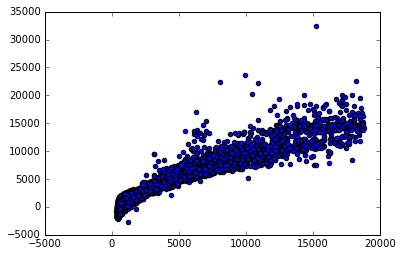

In [95]:
plt.scatter(lg4_test['price'], y_pred)
plt.show()

#### Looking at the high p values, removing the variables y and z. Creating the formula again

In [96]:
formula_remove_high_pvalue = 'price ~ carat+depth+table+x+cut_enc+color_enc+clarity_enc'

In [97]:
import statsmodels.formula.api as smf
lg_statmodel1 = smf.ols(formula= formula_remove_high_pvalue, data = lg4_train).fit()
lg_statmodel1.params

Intercept      11034.964416
carat          10978.073279
depth           -100.975565
table            -37.553770
x               -958.675707
cut_enc           98.037271
color_enc       -368.904086
clarity_enc     -518.041731
dtype: float64

In [98]:
print(lg_statmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 2.731e+04
Date:                Fri, 01 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:18:18   Log-Likelihood:            -1.6048e+05
No. Observations:               18870   AIC:                         3.210e+05
Df Residuals:                   18862   BIC:                         3.210e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.103e+04    675.683     16.332      

In [99]:
# RMSE for Train data
np.sqrt(lg_statmodel1.mse_resid)

1194.8478536192194

In [100]:
# RMSE for Test data
lg_statmodel_test1 = smf.ols(formula= formula_remove_high_pvalue, data = lg4_test).fit()
np.sqrt(lg_statmodel_test1.mse_resid)

1277.3532471316685

In [101]:
print(lg_statmodel_test1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                 1.080e+04
Date:                Fri, 01 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:18:19   Log-Likelihood:                -69322.
No. Observations:                8088   AIC:                         1.387e+05
Df Residuals:                    8080   BIC:                         1.387e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    9778.6714   1078.176      9.070      

In [102]:
# Prediction on Test data
y_pred1 = lg_statmodel1 .predict(lg4_test)

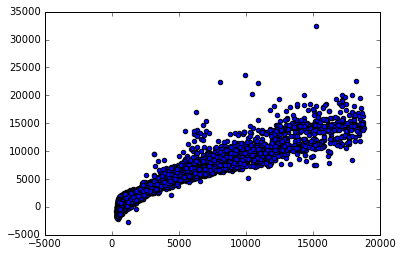

In [103]:
plt.scatter(lg4_test['price'], y_pred1)
plt.show()

#### 2nd Method :- Linear regression after Treatment of Outliers, Multicollinearity and scaling the dataset

In [104]:
# Outlier Treatment

def remove_outlier(col2):
    sorted(col2)
    Q1,Q3=np.percentile(col2,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [105]:
lg5=lg4.copy()
for column in lg5.iloc[:,0:7].columns:
    lr,ur=remove_outlier(lg5.iloc[:,0:7][column])
    lg5.iloc[:,0:7][column]=np.where(lg5.iloc[:,0:7][column]>ur,ur,lg5.iloc[:,0:7][column])
    lg5.iloc[:,0:7][column]=np.where(lg5.iloc[:,0:7][column]<lr,lr,lg5.iloc[:,0:7][column])

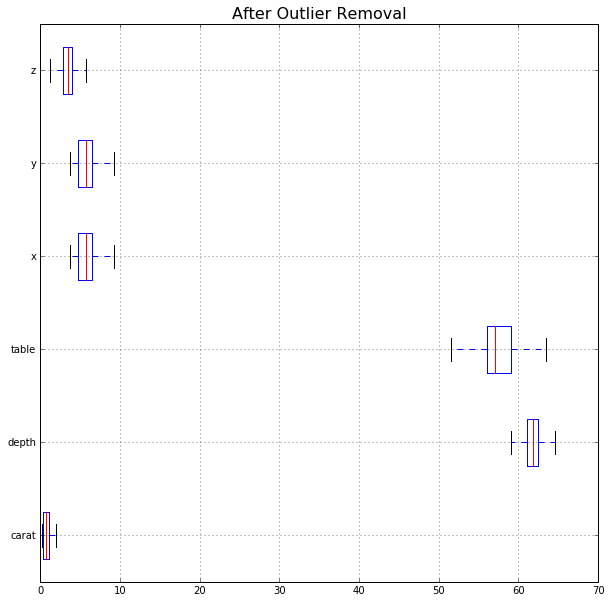

In [106]:
plt.figure(figsize=(10,10))
lg5.iloc[:,0:6].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

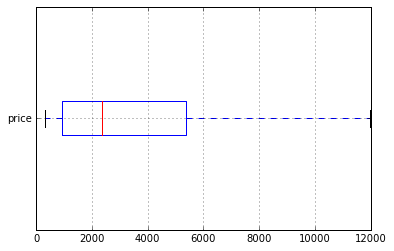

In [107]:
lg5[['price']].boxplot(vert=0)

In [108]:
# Scaling the dataset

In [109]:
from scipy.stats import zscore
lg5_cont = lg5.iloc[:,0:7].apply(zscore)
lg5_cont.describe()

,carat,depth,table,x,y,z,price
count,2.695800e+04,2.695800e+04,2.695800e+04,2.695800e+04,2.695800e+04,2.695800e+04,2.695800e+04
mean,3.031101e-18,2.454664e-15,2.769372e-15,-5.826303e-16,-1.856879e-16,8.446228e-16,-8.328938e-17
std,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00
min,-1.283615e+00,-2.257265e+00,-2.751988e+00,-1.775964e+00,-1.808331e+00,-3.373331e+00,-9.830831e-01
25%,-8.509974e-01,-5.339167e-01,-6.654218e-01,-9.057141e-01,-9.116963e-01,-9.166505e-01,-8.046688e-01
50%,-2.020711e-01,4.053287e-02,-2.017404e-01,-3.546440e-02,-2.847740e-02,-2.592407e-02,-3.925002e-01
75%,5.550096e-01,6.149824e-01,7.256223e-01,7.282241e-01,7.228176e-01,7.211368e-01,4.672893e-01
max,2.664020e+00,2.338331e+00,2.812188e+00,3.179132e+00,3.174588e+00,3.177818e+00,2.375227e+00


In [110]:
lg5.head()

,carat,depth,table,x,y,z,price,cut_enc,color_enc,clarity_enc
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,3.0,0.0,4.0
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0,2.0,2.0,0.0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,1.0,0.0,1.0
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,3.0,1.0,2.0
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0,3.0,1.0,0.0


In [111]:
lg5_ordinal = lg5.iloc[:,7:10]


In [112]:
lg5_scaled = pd.concat([lg5_cont,lg5_ordinal ],axis=1)
lg5_scaled.head()

,carat,depth,table,x,y,z,price,cut_enc,color_enc,clarity_enc
0,-1.067306,0.286726,0.261941,-1.296438,-1.289580,-1.261448,-0.933219,3.0,0.0,4.0
1,-1.002414,-0.780109,0.261941,-1.163237,-1.137532,-1.203982,-0.793428,2.0,2.0,0.0
2,0.230546,0.368790,1.189304,0.275339,0.347170,0.347606,0.735631,1.0,0.0,1.0
3,-0.807736,-0.123596,-0.665422,-0.808033,-0.833436,-0.830451,-0.765181,3.0,1.0,2.0
4,-1.045675,-1.108366,0.725622,-1.225398,-1.164364,-1.275814,-0.852515,3.0,1.0,0.0


In [113]:
lg5_scaled.corr()

,carat,depth,table,x,y,z,price,cut_enc,color_enc,clarity_enc
carat,1.000000,0.029844,0.187400,0.982882,0.981964,0.980877,0.936743,-0.136240,0.292714,0.358296
depth,0.029844,1.000000,-0.289484,-0.019531,-0.022567,0.095090,-0.000544,-0.203592,0.054979,0.066000
table,0.187400,-0.289484,1.000000,0.199932,0.194311,0.160748,0.138027,-0.445934,0.019773,0.156445
x,0.982882,-0.019531,0.199932,1.000000,0.998492,0.990898,0.913356,-0.128001,0.274918,0.378783
y,0.981964,-0.022567,0.194311,0.998492,1.000000,0.990535,0.914793,-0.129516,0.274425,0.373563
z,0.980877,0.095090,0.160748,0.990898,0.990535,1.000000,0.908588,-0.149965,0.279307,0.381729
price,0.936743,-0.000544,0.138027,0.913356,0.914793,0.908588,1.000000,-0.068011,0.180189,0.158711
cut_enc,-0.136240,-0.203592,-0.445934,-0.128001,-0.129516,-0.149965,-0.068011,1.000000,-0.017928,-0.176871
color_enc,0.292714,0.054979,0.019773,0.274918,0.274425,0.279307,0.180189,-0.017928,1.000000,-0.010637
clarity_enc,0.358296,0.066000,0.156445,0.378783,0.373563,0.381729,0.158711,-0.176871,-0.010637,1.000000


In [114]:
# x, y and z are length, width and height respectively and are correlated with each other, we can drop 2 of them. Dropping y and z variable

In [115]:
# Checking the muticolllinearity again using VIF method, so getting the dataset after removing the target variable
lg5_VIF_test = lg5_scaled.drop('price',axis=1)

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [117]:
vif = [variance_inflation_factor(lg5_VIF_test.values, ix) for ix in range(lg5_VIF_test.shape[1])] 

In [118]:
i=0
for column in lg5_VIF_test.columns:
    if i < 9:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 32.89330010210014
depth ---> 4.424640905371374
table ---> 1.4840719682852601
x ---> 412.1988600091747
y ---> 396.25031045537116
z ---> 235.1286531066565
cut_enc ---> 3.7403280308113174
color_enc ---> 2.2176755942481163
clarity_enc ---> 3.156837346904544


In [119]:
#Now dropping the y and z variables as x is more correlated with the target variable price 
#which is a good factor as per the correlation heatmap

lg5_final = lg5_scaled.drop(['y','z'], axis=1)

In [120]:
lg5_final.head()

,carat,depth,table,x,price,cut_enc,color_enc,clarity_enc
0,-1.067306,0.286726,0.261941,-1.296438,-0.933219,3.0,0.0,4.0
1,-1.002414,-0.780109,0.261941,-1.163237,-0.793428,2.0,2.0,0.0
2,0.230546,0.368790,1.189304,0.275339,0.735631,1.0,0.0,1.0
3,-0.807736,-0.123596,-0.665422,-0.808033,-0.765181,3.0,1.0,2.0
4,-1.045675,-1.108366,0.725622,-1.225398,-0.852515,3.0,1.0,0.0


In [121]:
# Now creating the linear regression model using the new dataset lg5_final which is free of Outliers, Multicollinearity and also Scaled

In [122]:
lg5_final.shape

(26958, 8)

In [123]:
# Copy all the predictor variables into X dataframe
x_scaled = lg5_final.drop('price', axis=1)

# Copy target into the y dataframe. 
y_scaled = lg5_final[['price']]

In [124]:
x_train_scaled,x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(x_scaled, y_scaled, test_size=0.3 , random_state=1)

In [125]:
#Using Sklearn's Linear Regression method

In [126]:
regression_model_scaled = LinearRegression()
regression_model_scaled.fit(x_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [127]:
for idx1, col_name2 in enumerate(x_train_scaled.columns):
    print("The coefficient for {} is {}".format(col_name2, regression_model_scaled.coef_[0][idx1]))

The coefficient for carat is 1.1953606023193677
The coefficient for depth is -0.017452359178781074
The coefficient for table is -0.01646689558043529
The coefficient for x is -0.13899986724554508
The coefficient for cut_enc is 0.025247287175425813
The coefficient for color_enc is -0.09033283323135105
The coefficient for clarity_enc is -0.132196270818553


In [128]:

# Let us check the intercept for the model

intercept1 = regression_model_scaled.intercept_[0]

print("The intercept for our model is {}".format(intercept1))

The intercept for our model is 0.49836625211707275


In [129]:

# R square on training data
RSqr_train_scaled = regression_model_scaled.score(x_train_scaled, y_train_scaled)
RSqr_train_scaled

0.9319594131910319

In [130]:

# R square on testing data
RSqr_test_scaled=regression_model_scaled.score(x_test_scaled, y_test_scaled)
RSqr_test_scaled

0.9273224522557245

In [131]:
#RMSE on Training data
from sklearn import metrics
predicted_train_scaled=regression_model_scaled.fit(x_train_scaled, y_train_scaled).predict(x_train_scaled)
RMSE_Train_scaled=np.sqrt(metrics.mean_squared_error(y_train_scaled,predicted_train_scaled))
RMSE_Train_scaled

0.2597683862872071

In [132]:

#RMSE on Testing data
predicted_test_scaled=regression_model_scaled.fit(x_train_scaled, y_train_scaled).predict(x_test_scaled)
RMSE_Test_scaled=np.sqrt(metrics.mean_squared_error(y_test_scaled,predicted_test_scaled))
RMSE_Test_scaled

0.27215396496931016

In [133]:
# Adjusted r - square value of Train data

Adj_r_sqr_Train_scaled = 1 - ((1-RSqr_train_scaled)*(len(x_train_scaled)-1)/(len(x_train_scaled)-x_train_scaled.shape[1]-1))
Adj_r_sqr_Train_scaled

0.9319341622045161

In [134]:
# Adjusted r - square value of Test data

Adj_r_sqr_Test_scaled = 1 - ((1-RSqr_test_scaled)*(len(x_test_scaled)-1)/(len(x_test_scaled)-x_test_scaled.shape[1]-1))
Adj_r_sqr_Test_scaled

0.9272594890336688

In [135]:
#Using Statmodel Linear Regression method

In [136]:
# concatenate X and y into a single dataframe
lg5_scaled_train = pd.concat([x_train_scaled, y_train_scaled], axis=1)
lg5_scaled_test=pd.concat([x_test_scaled,y_test_scaled],axis=1)


In [137]:
lg5_scaled_train.shape

(18870, 8)

In [138]:
formula2 = 'price ~ carat+depth+table+x+cut_enc+color_enc+clarity_enc'

In [139]:
import statsmodels.formula.api as smf
lg_statmodel_scaled = smf.ols(formula= formula2, data = lg5_scaled_train).fit()
lg_statmodel_scaled.params

Intercept      0.498366
carat          1.195361
depth         -0.017452
table         -0.016467
x             -0.139000
cut_enc        0.025247
color_enc     -0.090333
clarity_enc   -0.132196
dtype: float64

In [140]:
print(lg_statmodel_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 3.691e+04
Date:                Fri, 01 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:18:25   Log-Likelihood:                -1339.3
No. Observations:               18870   AIC:                             2695.
Df Residuals:                   18862   BIC:                             2757.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4984      0.007     72.683      

In [141]:
import statsmodels.formula.api as smf
lg_statmodel_scaled_test = smf.ols(formula= formula2, data = lg5_scaled_test).fit()
lg_statmodel_scaled_test.params

Intercept      0.504197
carat          1.136864
depth         -0.012059
table         -0.012224
x             -0.082893
cut_enc        0.027906
color_enc     -0.093715
clarity_enc   -0.136183
dtype: float64

In [142]:
print(lg_statmodel_scaled_test.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 1.478e+04
Date:                Fri, 01 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:18:25   Log-Likelihood:                -938.04
No. Observations:                8088   AIC:                             1892.
Df Residuals:                    8080   BIC:                             1948.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.5042      0.011     45.572      

In [143]:
# RMSE for Train data
np.sqrt(lg_statmodel_scaled.mse_resid)

0.25982346864284894

In [144]:
# RMSE for Test data
mse = np.mean((lg_statmodel_scaled.predict(lg5_scaled_test.drop('price',axis=1))-lg5_scaled_test['price'])**2)
np.sqrt(mse)

0.2721539649693102

In [145]:
# Prediction on Test data
y_pred_scaled = lg_statmodel_scaled.predict(lg5_scaled_test)

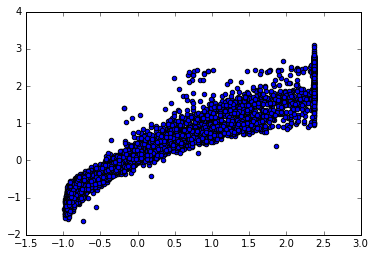

In [146]:
plt.scatter(lg5_scaled_test['price'], y_pred_scaled)
plt.show()

***As we can clearly interpret that after scaling, removing outliers and multicollinearity the model build has high performance parameters
The R-square, adjusted-rsquare has improved. The RMSE for both Test and Train dataset has reduced to a high extent. The cond. no. which was high in 
earlier case has reduced drastically in the 2nd method after scaling. Also the overall pvalue is less than alpha which means null hypothesis is rejected.
The coefficient cannot be zero. The best model is formulated below***

In [147]:
# Creating the model

for i,j in np.array(lg_statmodel_scaled .params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(0.5) * Intercept + (1.2) * carat + (-0.02) * depth + (-0.02) * table + (-0.14) * x + (0.03) * cut_enc + (-0.09) * color_enc + (-0.13) * clarity_enc + 

****Model is formulated below:****

***price = 0.5 + 1.2*carat - 0.02*depth - 0.02* table - 0.14*x + 0.025*cut_enc - 0.09*color_enc - 0.13*clarity_enc***

***1.4 Inference: Basis on these predictions, what are the business insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.***

In [148]:
# The business insights, recommendations and actionable insights are discussed in the Business report.

### Problem 2: Logistic Regression and LDA

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

### Data Dictionary:

Variable Name     | Description
-------------     | -------------
Holiday_Package   | Opted for Holiday Package yes/no?
Salary            | Employee salary
age               | Age in years
edu               | Years of formal education
no_young_children | The number of young children (younger than 7 years)
no_older_children | Number of older children
foreign           | foreigner Yes/No


#### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

#### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

#### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

#### 2.4 Inference: Basis on these predictions, what are the insights and recommendations.Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

***2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.***

In [149]:
# Importing the required libraries
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [150]:
# importing and reading the dataset

df =pd.read_csv("/home/jovyan/demo/Holiday_Package.csv")
#checking the first 10 rows of the dataset
df.head(10)

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no
5,6,yes,61590,42,12,0,1,no
6,7,no,94344,51,8,0,0,no
7,8,yes,35987,32,8,0,2,no
8,9,no,41140,39,12,0,0,no
9,10,no,35826,43,11,0,2,no


In [151]:
# checking the shape and datatype information
print(f'Shape of the datset is {df.shape}')
print("--------------")
print(df.info())

Shape of the datset is (872, 8)
--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB
None


In [152]:
df.select_dtypes(include='object').columns

Index(['Holliday_Package', 'foreign'], dtype='object')

In [153]:
## Observations : There are 872 rows in the dataset, seems there are no null values in the dataset, verifying the null values below
## There are 2 columns which have Object datatype, these needs to be chnaged to numerical

for col2 in df.columns:
    if df[col2].isnull().sum()!=0:
        print(f"{col2}: {df[col2].isnull().sum()}: {round(df[col2].isnull().mean()*100,2)}%")
else:print('There no columns with null values')

There no columns with null values


In [154]:
# Checking the Duplicate values

print('Duplicate values without index column is {}'.format(df.iloc[:, 1:].duplicated().sum()))
print(f'Duplicate values with index column {df.duplicated().sum()}')

Duplicate values without index column is 0
Duplicate values with index column 0


In [155]:
# Checking the unique values of the Object data types

object_values1 = []
for col5 in df.select_dtypes(include='object').columns:
    object_values1.append((col5, df[col2].nunique()))
object_values1 = sorted(object_values1, key=lambda x: x[1],reverse = True)
print("Unique values in each column are as follows\n")
for col5,nunique in object_values1:
    print(f"{col5}: {nunique}: {df[col5].unique()}")

Unique values in each column are as follows

Holliday_Package: 2: ['no' 'yes']
foreign: 2: ['no' 'yes']


In [156]:
df['Holliday_Package'].value_counts(normalize=True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

In [157]:
df['foreign'].value_counts(normalize=True)

no     0.752294
yes    0.247706
Name: foreign, dtype: float64

In [158]:
# Checking for junk values like "?"

for t in df.columns:
    if len(df[df[t]=='?'])==0:
        print('No Junk value found in {}'.format(t))
    else:
        print(' Junk value found in {}'.format(t))

No Junk value found in Unnamed: 0
No Junk value found in Holliday_Package
No Junk value found in Salary
No Junk value found in age
No Junk value found in educ
No Junk value found in no_young_children
No Junk value found in no_older_children
No Junk value found in foreign


In [159]:
# for t in df.columns:
#     if df[]
#     print('Junk value found in {}'.format(t))
len(df[df['Salary']=='?'])

0

In [160]:
# Checking the statistical description of the dataset
df.describe(include='all')

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872.000000,872,872.000000,872.000000,872.000000,872.000000,872.000000,872
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,2
top,NaN,no,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,471,NaN,NaN,NaN,NaN,NaN,656
mean,436.500000,NaN,47729.172018,39.955275,9.307339,0.311927,0.982798,NaN
std,251.869014,NaN,23418.668531,10.551675,3.036259,0.612870,1.086786,NaN
min,1.000000,NaN,1322.000000,20.000000,1.000000,0.000000,0.000000,NaN
25%,218.750000,NaN,35324.000000,32.000000,8.000000,0.000000,0.000000,NaN
50%,436.500000,NaN,41903.500000,39.000000,9.000000,0.000000,1.000000,NaN
75%,654.250000,NaN,53469.500000,48.000000,12.000000,0.000000,2.000000,NaN


In [161]:
# Most of the people did not opt for Holiday package and most of the people are not foreigner (656)
# Average values :  Salary = 47729, Age= 40, Education = 9 years,No. of young children = 0 (rounded), No. of older children= 1
# The Salary and no. of young children distribution is right skewed

In [162]:
# Checking for 0 values in the dataset

col_0 = df.columns
for k in col_0:
    print(f'Count of 0 values in Column {k} are {df[df[k]==0][k].count()}')

Count of 0 values in Column Unnamed: 0 are 0
Count of 0 values in Column Holliday_Package are 0
Count of 0 values in Column Salary are 0
Count of 0 values in Column age are 0
Count of 0 values in Column educ are 0
Count of 0 values in Column no_young_children are 665
Count of 0 values in Column no_older_children are 393
Count of 0 values in Column foreign are 0


In [163]:
# We can see only 2 variables, no_young_children and no_older_children have 0 values which is logically correct

In [164]:
# checking the skewness
df.skew()

Unnamed: 0           0.000000
Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

In [165]:
# As seen above, Salary and no. of young children are highly skewed

### Univariate Analysis

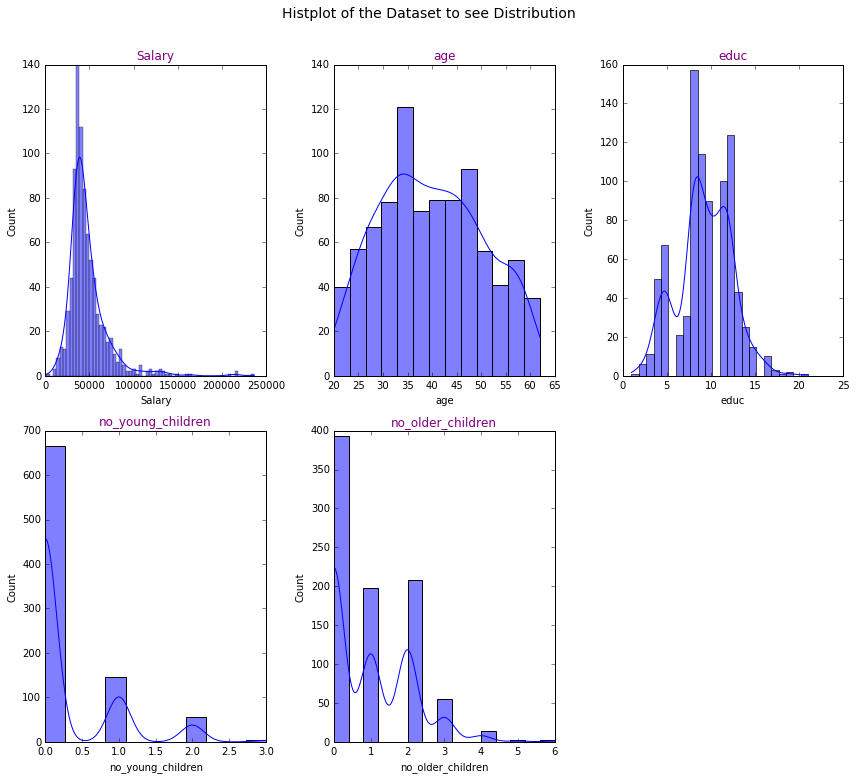

In [166]:
# Plotting Histplot to see if there are any outlier in any of the Columns
# Excluding the Unnamed Column
df1 = df.iloc[:, 1:]
fig=plt.figure(figsize=(12,15))
fig.suptitle('Histplot of the Dataset to see Distribution',fontsize=14, y=1.03)
for i in range(0,df1.select_dtypes(exclude='object').shape[1]):
    ax=fig.add_subplot(3,3,i+1)
    sns.histplot(df1[df1.select_dtypes(exclude='object').columns[i]], kde=True)
    ax.set_title(df1.select_dtypes(exclude='object').columns[i], color='purple')
    
plt.tight_layout()
plt.show()

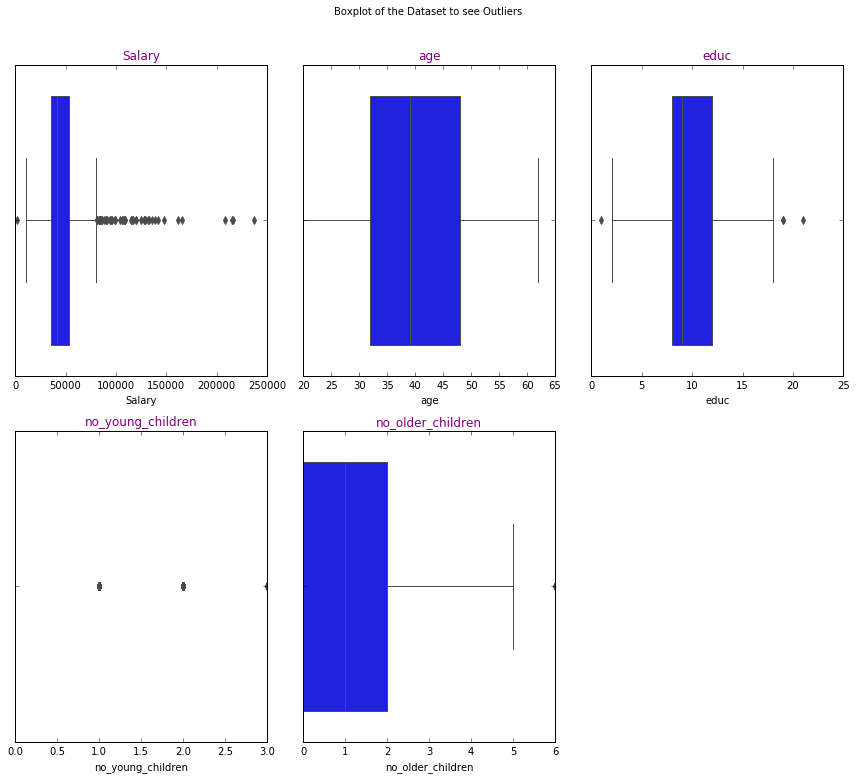

In [167]:
# Plotting Boxplot to see if there are any outlier in any of the Columns

fig=plt.figure(figsize=(12,15))
fig.suptitle('Boxplot of the Dataset to see Outliers', y=1.03)
for i in range(0,df1.select_dtypes(exclude='object').shape[1]):
    ax=fig.add_subplot(3,3,i+1)
    sns.boxplot(df1[df1.select_dtypes(exclude='object').columns[i]])
    ax.set_title(df1.select_dtypes(exclude='object').columns[i], color='purple')
    
plt.tight_layout()
plt.show()

In [168]:
# We can see that the variables Salary has large volume of Outliers followed by Education and no_young children

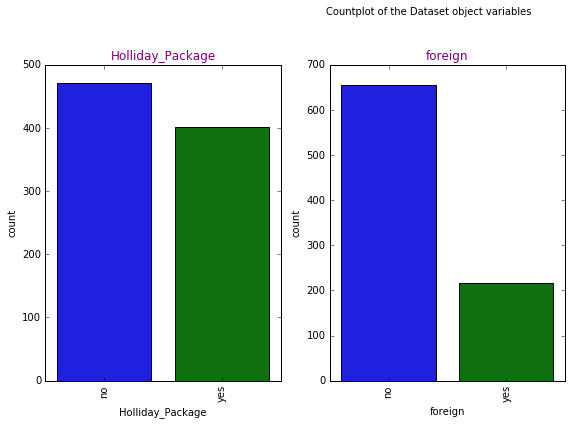

In [169]:
# Univariate analysis of the Categorical variable

fig=plt.figure(figsize=(12,15))
fig.suptitle('Countplot of the Dataset object variables', y=1.03)
for i in range(0,df1.select_dtypes(include='object').shape[1]):
    ax=fig.add_subplot(3,3,i+1)
    sns.countplot(df1[df1.select_dtypes(include='object').columns[i]])
    plt.xticks(rotation=90)
    ax.set_title(df1.select_dtypes(include='object').columns[i], color='purple')
    
plt.tight_layout()
plt.show()

In [170]:
# We can obserte that the proportion of people not opting for Holiday package is higher and this case is same with Foreigner.

### Bivariate Analysis

In [171]:
# Using Bivariate Analysis between the variables
# Starting with Target Variable (Holliday_Package) versus the indpendent variables with numeric datatype

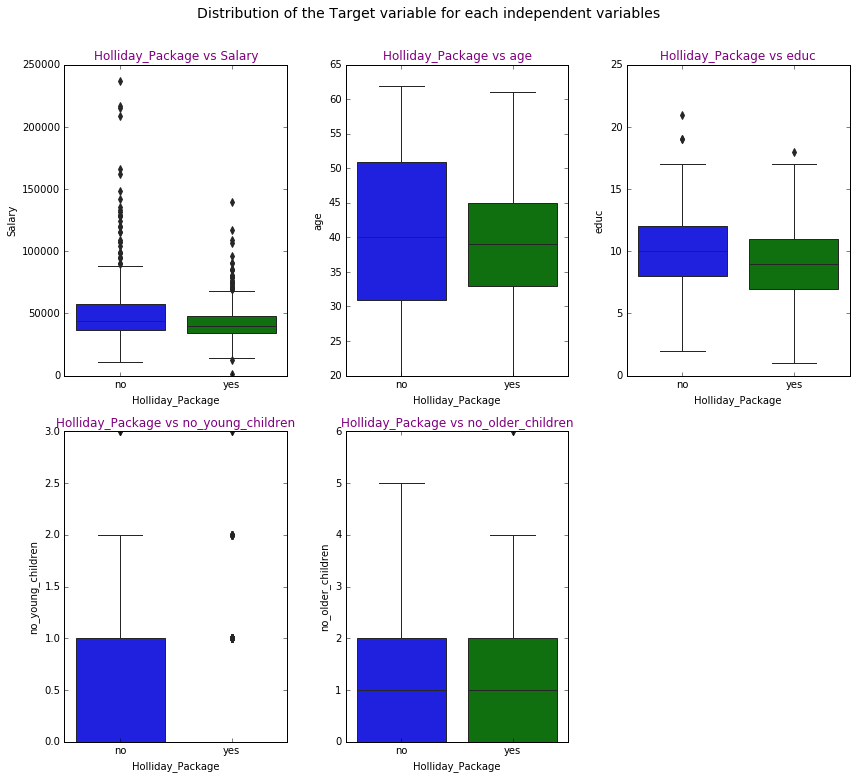

In [172]:
# Countplot of Target variable with other independent continuous variables
fig=plt.figure(figsize=(12,15))
fig.suptitle('Distribution of the Target variable for each independent variables', y=1.03, fontsize=14)
for i in range(0,df1.select_dtypes(exclude='object').shape[1]):
    ax=fig.add_subplot(3,3,i+1)
    sns.boxplot(x=df1['Holliday_Package'], y=df1[df1.select_dtypes(exclude='object').columns[i]], data=df1)
    ax.set_title('Holliday_Package vs {}'.format(df1.select_dtypes(exclude='object').columns[i]), color='purple')
    
plt.tight_layout()
plt.show()

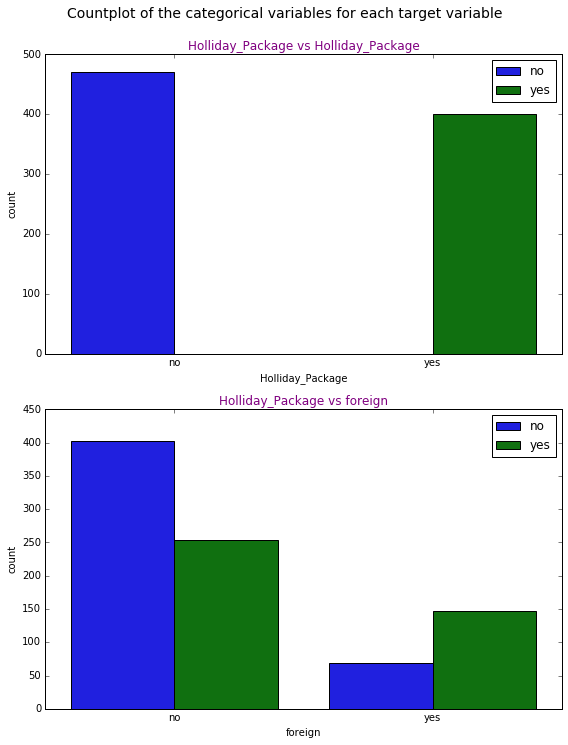

In [173]:
# Bivariate analysis using Countplot of the Categorical independent variable against the target variable

fig=plt.figure(figsize=(8,10))
fig.suptitle('Countplot of the categorical variables for each target variable', y=1.03, fontsize=14)
for i in range(0,df1.select_dtypes(include='object').shape[1]):
    ax=fig.add_subplot(2,1,i+1)
    sns.countplot(x=df1[df1.select_dtypes(include='object').columns[i]], hue='Holliday_Package', data=df1)
    ax.set_title('Holliday_Package vs {}'.format(df1.select_dtypes(include='object').columns[i]), color='purple')
    plt.legend( loc='best')
plt.tight_layout()
plt.show()

In [174]:
# Inferences :
# 1. Employees with highter Salary ranges have not opted for Holiday package
# 2. Age, education and no. of older children does not seem to impact much of choosing holiday package with few outliers
# 3. Employees with zero young children have opted for holiday package with few outliers
# 4. Considering foreigner status, employees who have opted for the package, most of them are Non Foreigner employees h

### Multivariate Analysis

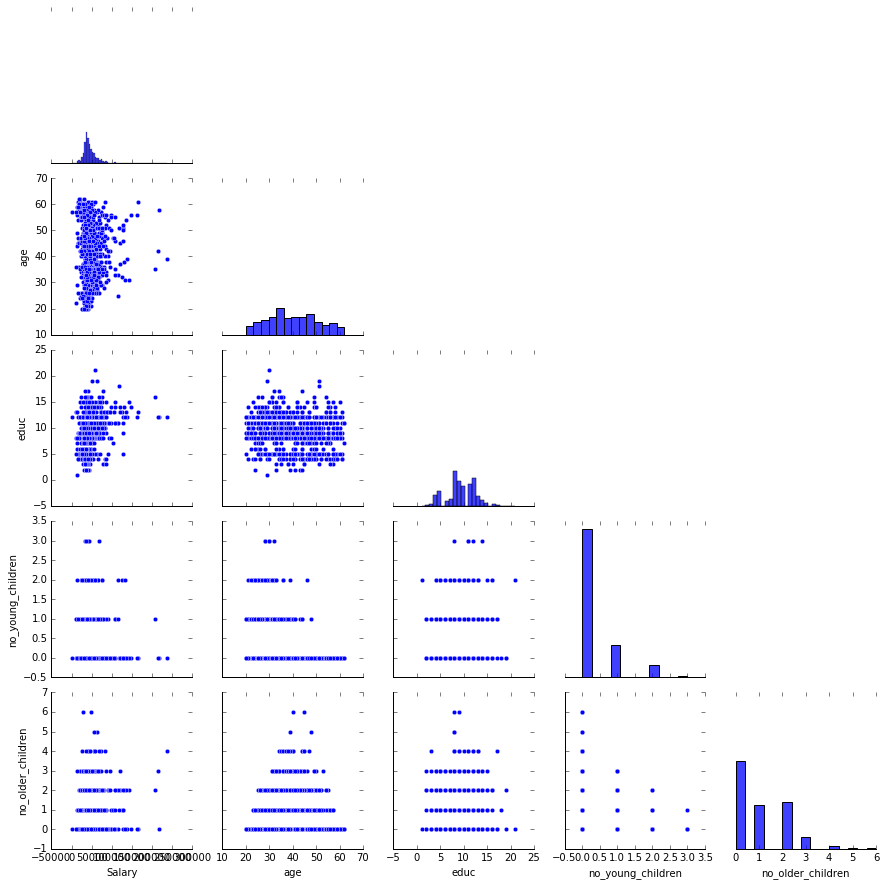

In [175]:

# Plotting a pair plot to see correlation among variables

sns.pairplot(df1, corner=1)

In [176]:
# plotting the correlation matrix
df_corr = df1.corr()
df_corr

,Salary,age,educ,no_young_children,no_older_children
Salary,1.000000,0.071709,0.326540,-0.029664,0.113772
age,0.071709,1.000000,-0.149294,-0.519093,-0.116205
educ,0.326540,-0.149294,1.000000,0.098350,-0.036321
no_young_children,-0.029664,-0.519093,0.098350,1.000000,-0.238428
no_older_children,0.113772,-0.116205,-0.036321,-0.238428,1.000000


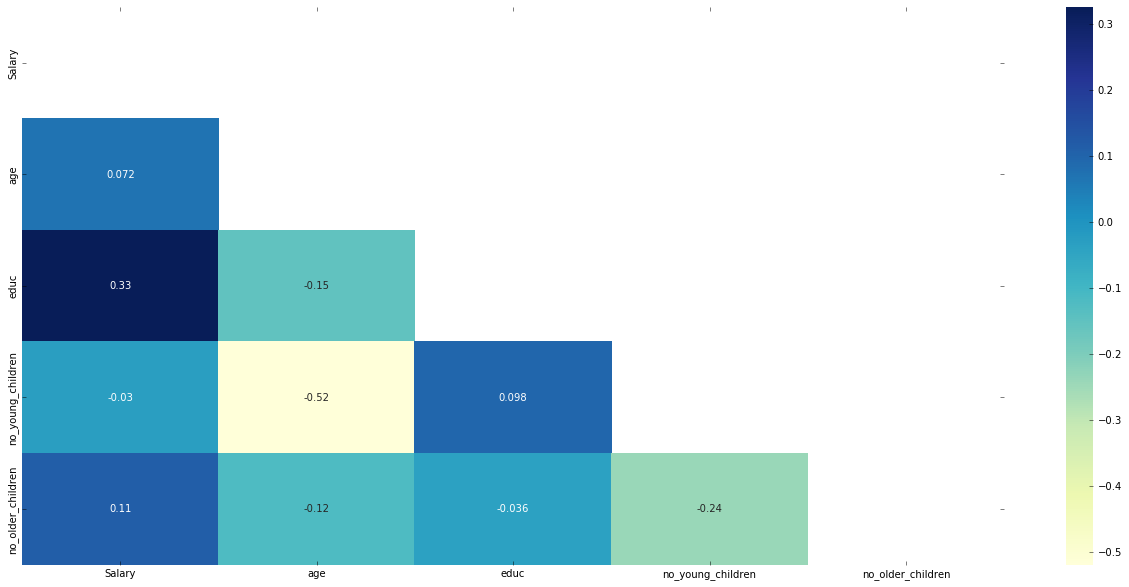

In [177]:
mask1= np.triu(np.ones_like(df1.corr(), dtype=np.bool)) 
plt.figure(figsize=(22, 10))
sns.heatmap(df1.corr(), annot=True, cmap='YlGnBu', mask=mask1,)

In [178]:
# From the correlation heatmap, we can infer that there is a mild negative correlation between no. of young children and age

In [179]:
# Checking the collinearity using Variance Inflation Factor

In [180]:
X1 = df1.drop('Holliday_Package',axis=1)


In [181]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif1 = [variance_inflation_factor(X1.select_dtypes(exclude='object').values, ix1) for ix1 in range(X1.select_dtypes(exclude='object').shape[1])] 

i=0
for column in X1.select_dtypes(exclude='object').columns:
    if i < 6:
        print (column ,"--->",  vif[i])
        i = i+1

Salary ---> 32.89330010210014
age ---> 4.424640905371374
educ ---> 1.4840719682852601
no_young_children ---> 412.1988600091747
no_older_children ---> 396.25031045537116


In [182]:
# As discussed above, no_young_children has negative correlation with age

***2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).***

##### Encoding the variables with string values
##### The values of the object datatypes are as follows :
##### Holliday_Package: 2: ['no' 'yes']
##### foreign: 2: ['no' 'yes']

In [183]:
# Label encoding the object variables

for j in df1.select_dtypes(['object']).columns:
    print('\n')
    print(f'Unique values of Variable {j} are {df1[j].unique()}')
    print(f'Categorical codes of encoded variable {j} are {pd.Categorical(df1[j].unique()).codes}')
    df1[j]=pd.Categorical(df1[j]).codes



Unique values of Variable Holliday_Package are ['no' 'yes']
Categorical codes of encoded variable Holliday_Package are [0 1]


Unique values of Variable foreign are ['no' 'yes']
Categorical codes of encoded variable foreign are [0 1]


In [184]:
# Dataset showing encoded object variables

df1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


In [185]:
# Data Split: Split the data into train and test (70:30)

In [186]:
X2 = df1.drop('Holliday_Package',axis=1)
Y2 = df1[['Holliday_Package']]

In [187]:
from sklearn.model_selection import train_test_split
x_train1,x_test1, y_train1, y_test1 = train_test_split(X2, Y2, test_size=0.3 , random_state=1)

#### Logistic regression and LDA will be applied with and without removing Outliers and multicollinearity
#### 1st Method : Applying Logistic Regression and LDA with Original Dataset without removing Outliers and multicollinearity. The split for Train and Test are x_train1,x_test1, y_train1, y_test1

#### Applying Logistic Regression

In [188]:
print('Number of rows and columns of the training set for the independent variables:',x_train1.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train1.shape)
print('Number of rows and columns of the test set for the independent variables:',x_test1.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test1.shape)

Number of rows and columns of the training set for the independent variables: (610, 6)
Number of rows and columns of the training set for the dependent variable: (610, 1)
Number of rows and columns of the test set for the independent variables: (262, 6)
Number of rows and columns of the test set for the dependent variable: (262, 1)


In [189]:
# Applying GridSearch to find the best parameters
grid={'tol':[0.001,0.0001],
    'solver':['sag','lbfgs','newton-cg','liblinear'], 'C':[1.0,0.1,0.01],'penalty':['l2']  }


In [190]:
# Fit the Logistic Regression model
model_LR = LogisticRegression(max_iter=100,verbose=False,n_jobs=-1)


In [191]:
grid_search = GridSearchCV(estimator = model_LR, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [192]:
Class_LR=grid_search.fit(x_train1, y_train1)

In [193]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.001} 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.001,
                   verbose=False, warm_start=False)


In [194]:
best_model = grid_search.best_estimator_

In [195]:
for id_lr, col_name3 in enumerate(x_train1.columns):
    print("The coefficient for {} is {}".format(col_name3, best_model.coef_[0][id_lr]))
print('\n')
print(f'Intercept is {best_model.intercept_}')

The coefficient for Salary is -1.7432597167064538e-05
The coefficient for age is -0.05295732585709175
The coefficient for educ is 0.07150327331370687
The coefficient for no_young_children is -1.4590797868487684
The coefficient for no_older_children is -0.04637907239571996
The coefficient for foreign is 1.4762349597044966


Intercept is [2.24752104]


In [196]:
# Predicting on Training and Test dataset

In [197]:
ytrain_predict_lr1 = best_model.predict(x_train1)
ytest_predict_lr1 = best_model.predict(x_test1)

In [198]:
# Finding the Predicted Classes and Probs

In [199]:
ytest_predict_lr1_prob =best_model.predict_proba(x_test1)
pd.DataFrame(ytest_predict_lr1_prob).head()

,0,1
0,0.753599,0.246401
1,0.287308,0.712692
2,0.888743,0.111257
3,0.974783,0.025217
4,0.499096,0.500904


##### Applying Linear Discriminant Analysis

In [200]:
# Applying GridSearch to find the best parameters
grid_lda={'solver':['svd','lsqr', 'eigen'],
      'tol':[0.001,0.0001]}

In [201]:
# Fit the LDA model in the new dataset

In [202]:

LDA = LinearDiscriminantAnalysis()


In [203]:
grid_search_LDA = GridSearchCV(estimator = LDA, param_grid = grid_lda, cv = 3,n_jobs=-1,scoring='f1')

In [204]:
Class_LDA=grid_search_LDA.fit(x_train1, y_train1)

In [205]:
print(grid_search_LDA.best_params_,'\n')
print(grid_search_LDA.best_estimator_)

{'solver': 'svd', 'tol': 0.001} 

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.001)


In [206]:
best_model_LDA = grid_search_LDA.best_estimator_

In [207]:
# Predicting on Training and Test dataset

In [208]:

ytrain_predict_lda1 = best_model_LDA.predict(x_train1)

ytest_predict_lda1  = best_model_LDA.predict(x_test1)

In [209]:
# Finding the Predicted Classes and Probs

In [210]:
ytest_predict_lda1_prob =best_model_LDA.predict_proba(x_test1)
pd.DataFrame(ytest_predict_lda1_prob).head()

,0,1
0,0.736312,0.263688
1,0.277893,0.722107
2,0.887243,0.112757
3,0.967803,0.032197
4,0.523170,0.476830


#### 2nd Method : Applying Logistic Regression and LDA with the new Dataset after removing Outliers and multicollinearity. 

In [211]:
df1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


In [212]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Holliday_Package   872 non-null    int8 
 1   Salary             872 non-null    int64
 2   age                872 non-null    int64
 3   educ               872 non-null    int64
 4   no_young_children  872 non-null    int64
 5   no_older_children  872 non-null    int64
 6   foreign            872 non-null    int8 
dtypes: int64(5), int8(2)
memory usage: 35.9 KB


In [213]:
# Outlier Treatment

def remove_outlier(col2):
    sorted(col2)
    Q1,Q3=np.percentile(col2,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [214]:
# Removing the Outliers
df2=df1.copy()
for column in ['Salary', 'age', 'educ', 'no_young_children', 'no_older_children']:
    lr,ur=remove_outlier(df2[column])
    df2[column]=np.where(df2[column]>ur,ur,df2[column])
    df2[column]=np.where(df2[column]<lr,lr,df2[column])
   

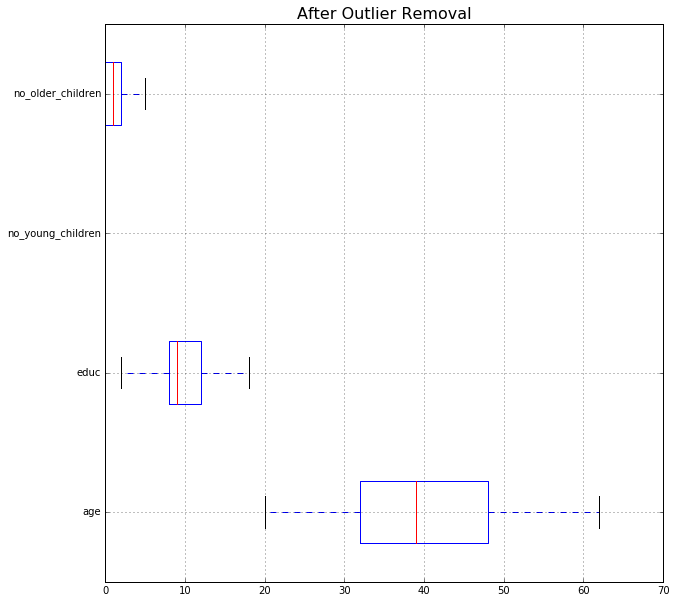

In [215]:
plt.figure(figsize=(10,10))
df2.loc[:, ~df2.columns.isin(['Salary','foreign','Holliday_Package'])].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

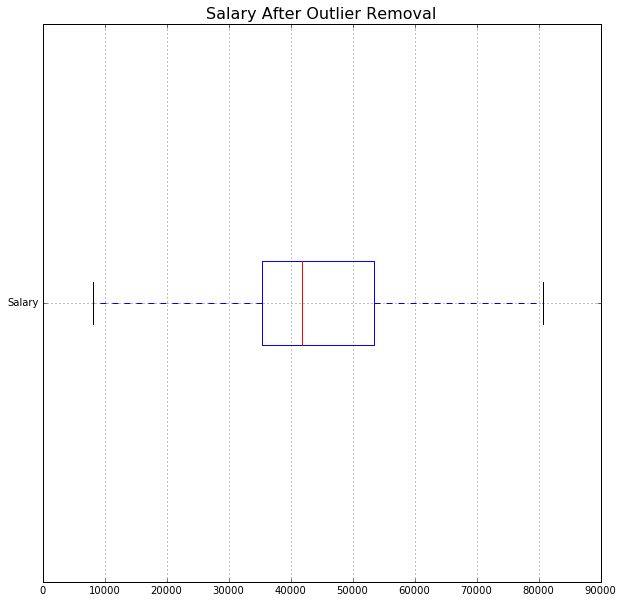

In [216]:
plt.figure(figsize=(10,10))
df2[['Salary']].boxplot(vert=0)
plt.title('Salary After Outlier Removal',fontsize=16)
plt.show()

In [217]:
# Removing Multicollienarity by removing the variable with highest VIF and highest corresponding correlation with another variable.
# The variable, no_young_children has the highest VIF and high correlation coefficient, therefore removing this variable from the dataset

In [218]:
df2=df2.drop('no_young_children',axis=1)
df2.head()

,Holliday_Package,Salary,age,educ,no_older_children,foreign
0,0,48412.0,30.0,8.0,1.0,0
1,1,37207.0,45.0,8.0,1.0,0
2,0,58022.0,46.0,9.0,0.0,0
3,0,66503.0,31.0,11.0,0.0,0
4,0,66734.0,44.0,12.0,2.0,0


In [219]:
# Now again performing the Data Split on the new dataset df2 which do not have Outliers and collinearity: Split the data into train and test (70:30)

In [220]:
X2_new = df2.drop('Holliday_Package',axis=1)
Y2_new = df2[['Holliday_Package']]

In [221]:
from sklearn.model_selection import train_test_split
x_train2,x_test2, y_train2, y_test2 = train_test_split(X2_new, Y2_new, test_size=0.3 , random_state=1)

#### Applying Logistic Regression on new dataset without Outlier and Collinearity

In [222]:
# Applying GridSearch to find the best parameters
grid={'tol':[0.001,0.0001],
    'solver':['sag','lbfgs','newton-cg','liblinear'], 'C':[1.0,0.1,0.01],'penalty':['l2']  }


In [223]:
# Fit the Logistic Regression model in the new dataset
model_LR1 = LogisticRegression(max_iter=10000,verbose=True,n_jobs=2)


In [224]:
grid_search1 = GridSearchCV(estimator = model_LR1, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [225]:
Class_LR1=grid_search1.fit(x_train2, y_train2)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concu

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.3s finished


In [226]:
print(grid_search1.best_params_,'\n')
print(grid_search1.best_estimator_)

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.001} 

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=2, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.001,
                   verbose=True, warm_start=False)


In [227]:
best_model1 = grid_search1.best_estimator_

In [228]:
for id_lr1, col_name4 in enumerate(x_train2.columns):
    print("The coefficient for {} is {}".format(col_name4, best_model1.coef_[0][id_lr1]))
print('\n')
print(f'Intercept is {best_model1.intercept_}')

The coefficient for Salary is -1.875679736201563e-05
The coefficient for age is -0.012681942775078801
The coefficient for educ is 0.03512975721396163
The coefficient for no_older_children is 0.16644870534541414
The coefficient for foreign is 0.8660080202962679


Intercept is [0.5264828]


In [229]:
# Predicting on Training and Test dataset

In [230]:
ytrain_predict_lr2 = best_model1.predict(x_train2)
ytest_predict_lr2 = best_model1.predict(x_test2)

In [231]:
# Finding the Predicted Classes and Probs

In [232]:
ytest_predict_lr2_prob =best_model1.predict_proba(x_test2)
pd.DataFrame(ytest_predict_lr2_prob).head()

,0,1
0,0.686432,0.313568
1,0.388716,0.611284
2,0.564397,0.435603
3,0.683445,0.316555
4,0.345368,0.654632


#### Applying Linear Discriminant Analysis on new dataset without Outlier and Collinearity

In [233]:
# Applying GridSearch to find the best parameters
grid_lda={'solver':['svd','lsqr', 'eigen'],
      'tol':[0.001,0.0001]}

In [234]:
# Fit the LDA model in the new dataset


In [235]:
LDA = LinearDiscriminantAnalysis()

In [236]:
grid_search_LDA1 = GridSearchCV(estimator = LDA, param_grid = grid_lda, cv = 3,n_jobs=-1,scoring='f1')

In [237]:
Class_LDA1=grid_search_LDA1.fit(x_train2, y_train2)

In [238]:
print(grid_search_LDA1.best_params_,'\n')
print(grid_search_LDA1.best_estimator_)

{'solver': 'svd', 'tol': 0.001} 

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.001)


In [239]:
best_model_LDA1 = grid_search_LDA1.best_estimator_

In [240]:
# Predicting on Training and Test dataset

In [241]:

ytrain_predict_lda2 = best_model_LDA1.predict(x_train2)

ytest_predict_lda2  = best_model_LDA1.predict(x_test2)

In [242]:
# Finding the Predicted Classes and Probs

In [243]:
ytest_predict_lda2_prob =best_model_LDA1.predict_proba(x_test2)
pd.DataFrame(ytest_predict_lda2_prob).head()

,0,1
0,0.701405,0.298595
1,0.326676,0.673324
2,0.625464,0.374536
3,0.691134,0.308866
4,0.360268,0.639732


***2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.***

### Performance Meterics for the predictions done on the Dataset with Outliers and Multicollinearity 

In [244]:
# Accuracy Score of the 2 models using dataset with Outliers

LogReg_Train_Score = best_model.score(x_train1,y_train1)
LogReg_Test_Score = best_model.score(x_test1,y_test1)

LDA_Train_Score = best_model_LDA.score(x_train1,y_train1)
LDA_Test_Score = best_model_LDA.score(x_test1,y_test1)



In [245]:
Accuracy_Scores = pd.DataFrame(data = [[LogReg_Train_Score,LogReg_Test_Score],[LDA_Train_Score,LDA_Test_Score]], columns = ['Train_Score','Test_Score'], index = ['Log_Regression','LDA']) 

In [246]:
Accuracy_Scores 

,Train_Score,Test_Score
Log_Regression,0.680328,0.645038
LDA,0.672131,0.641221


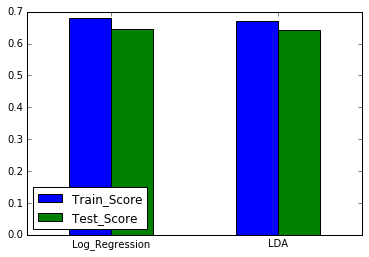

In [247]:

Accuracy_Scores.plot(kind = 'bar')
plt.xticks(rotation=0)
plt.legend(loc='lower left')

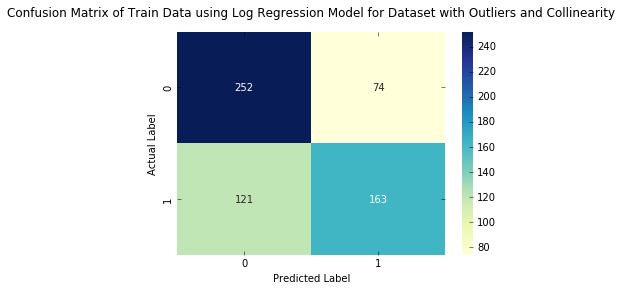

In [248]:
# Plotting the Confusion matrix on the TRAIN dataset for Logistic Regression model

confusion_matrix(y_train1, ytrain_predict_lr1)
sns.heatmap(confusion_matrix(y_train1, ytrain_predict_lr1),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data using Log Regression Model for Dataset with Outliers and Collinearity', pad =15)
plt.show()

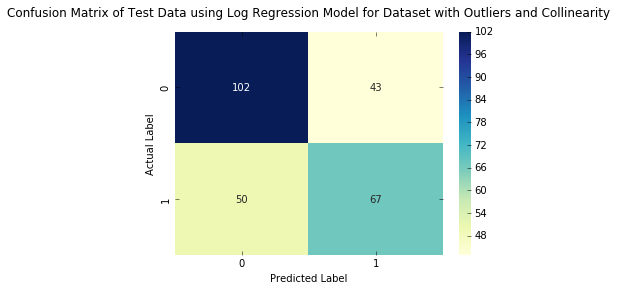

In [249]:
# Plotting the Confusion matrix on the TEST dataset for Logistic Regression model

confusion_matrix(y_test1, ytest_predict_lr1)
sns.heatmap(confusion_matrix(y_test1, ytest_predict_lr1),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data using Log Regression Model for Dataset with Outliers and Collinearity', pad =15)
plt.show()

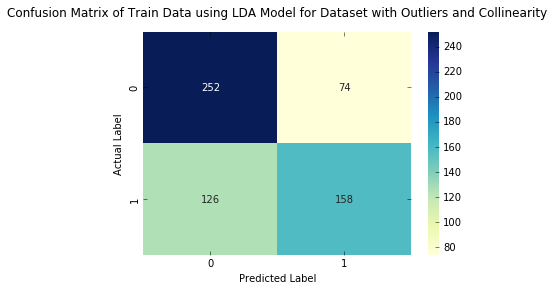

In [250]:
# Plotting the Confusion matrix on the TRAIN dataset for LDA model

confusion_matrix(y_train1, ytrain_predict_lda1)
sns.heatmap(confusion_matrix(y_train1, ytrain_predict_lda1),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data using LDA Model for Dataset with Outliers and Collinearity', pad =15)
plt.show()

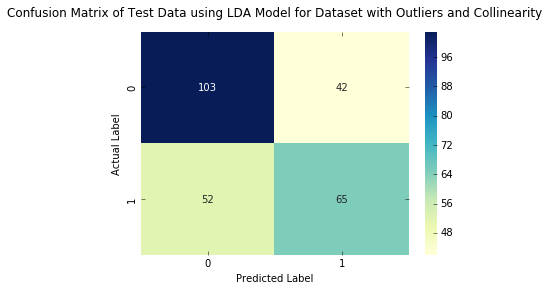

In [251]:
# Plotting the Confusion matrix on the TEST dataset for LDA model

confusion_matrix(y_test1, ytest_predict_lda1)
sns.heatmap(confusion_matrix(y_test1, ytest_predict_lda1),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data using LDA Model for Dataset with Outliers and Collinearity', pad =15)
plt.show()

In [252]:
# Classification Report of TRAIN data for Log Regression model

print(classification_report(y_train1, ytrain_predict_lr1))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72       326
           1       0.69      0.57      0.63       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.68       610



In [253]:
# Classification Report of TEST data for Log Regression model

print(classification_report(y_test1, ytest_predict_lr1))

              precision    recall  f1-score   support

           0       0.67      0.70      0.69       145
           1       0.61      0.57      0.59       117

    accuracy                           0.65       262
   macro avg       0.64      0.64      0.64       262
weighted avg       0.64      0.65      0.64       262



In [254]:
# Classification Report of TRAIN data for LDA model

print(classification_report(y_train1, ytrain_predict_lda1))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610



In [255]:
# Classification Report of TEST data for LDA model

print(classification_report(y_test1, ytest_predict_lda1))

              precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



AUC: 0.743


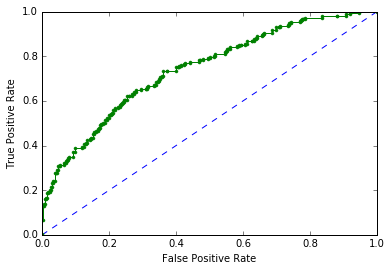

In [256]:
# AUC-ROC curve of Train data - log Regression

# predict probabilities
probs = best_model.predict_proba(x_train1)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_train_lr = roc_auc_score(y_train1, probs)
print('AUC: %.3f' % auc_train_lr)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train1, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

AUC: 0.705


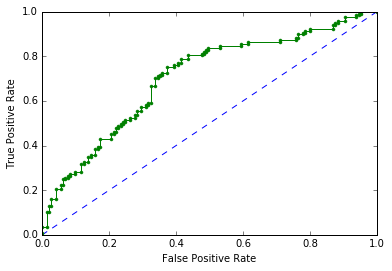

In [257]:
# AUC-ROC curve of Test data - log Regression

# predict probabilities
probs = best_model.predict_proba(x_test1)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_test_lr = roc_auc_score(y_test1, probs)
print('AUC: %.3f' % auc_test_lr)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test1, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

AUC: 0.742


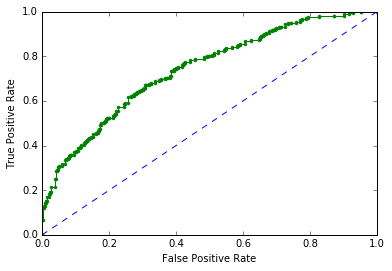

In [258]:
# AUC-ROC curve of Train data - LDA

# predict probabilities
probs = best_model_LDA.predict_proba(x_train1)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_train_lda = roc_auc_score(y_train1, probs)
print('AUC: %.3f' % auc_train_lda)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train1, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

AUC: 0.742


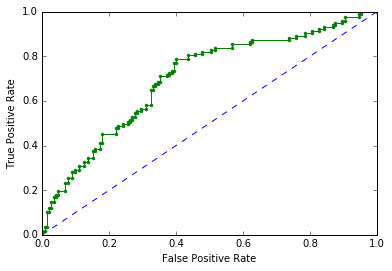

In [259]:
# AUC-ROC curve of Test data - LDA

# predict probabilities
probs = best_model_LDA.predict_proba(x_test1)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_test_lda = roc_auc_score(y_test1, probs)
print('AUC: %.3f' % auc_train_lda)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test1, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

### Performance Meterics for the predictions done on the new Dataset without Outliers and Multicollinearity 

In [260]:
# Accuracy Score of the 2 models using dataset without Outliers

LogReg_Train_Score1 = best_model1.score(x_train2,y_train2)
LogReg_Test_Score1 = best_model1.score(x_test2,y_test2)

LDA_Train_Score1 = best_model_LDA1.score(x_train2,y_train2)
LDA_Test_Score1 = best_model_LDA1.score(x_test2,y_test2)

In [261]:
Accuracy_Scores_new = pd.DataFrame(data = [[LogReg_Train_Score1,LogReg_Test_Score1],[LDA_Train_Score1,LDA_Test_Score1]], columns = ['Train_Score','Test_Score'], index = ['Log_Regression','LDA']) 

In [262]:
Accuracy_Scores_new

,Train_Score,Test_Score
Log_Regression,0.647541,0.629771
LDA,0.642623,0.629771


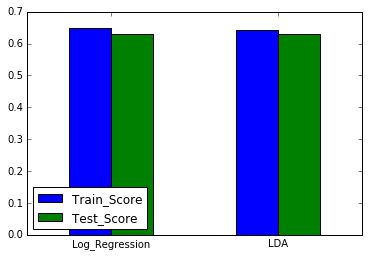

In [301]:
Accuracy_Scores_new.plot(kind = 'bar')
plt.xticks(rotation=0)
plt.legend(loc='lower left')

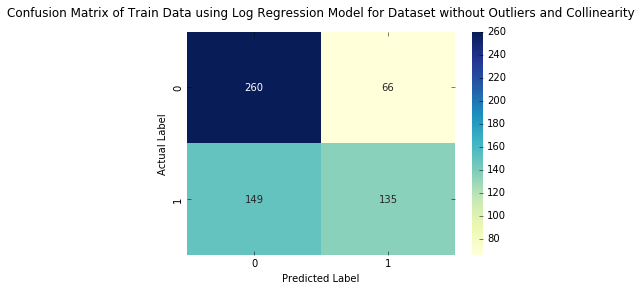

In [264]:
# Plotting the Confusion matrix on the TRAIN dataset for Logistic Regression model

confusion_matrix(y_train2, ytrain_predict_lr2)
sns.heatmap(confusion_matrix(y_train2, ytrain_predict_lr2),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data using Log Regression Model for Dataset without Outliers and Collinearity', pad =15)
plt.show()

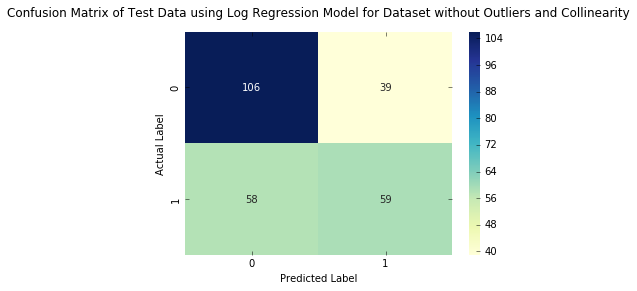

In [265]:
# Plotting the Confusion matrix on the TEST dataset for Logistic Regression model

confusion_matrix(y_test2, ytest_predict_lr2)
sns.heatmap(confusion_matrix(y_test2, ytest_predict_lr2),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data using Log Regression Model for Dataset without Outliers and Collinearity', pad =15)
plt.show()

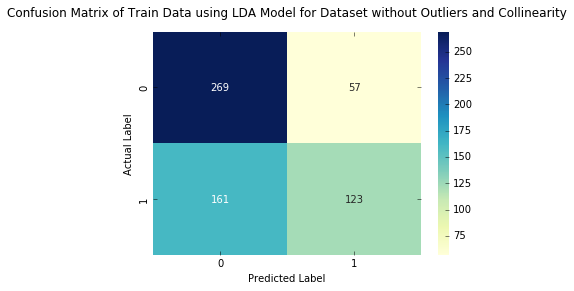

In [266]:
# Plotting the Confusion matrix on the TRAIN dataset for LDA model

confusion_matrix(y_train2, ytrain_predict_lda2)
sns.heatmap(confusion_matrix(y_train2, ytrain_predict_lda2),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data using LDA Model for Dataset without Outliers and Collinearity', pad =15)
plt.show()

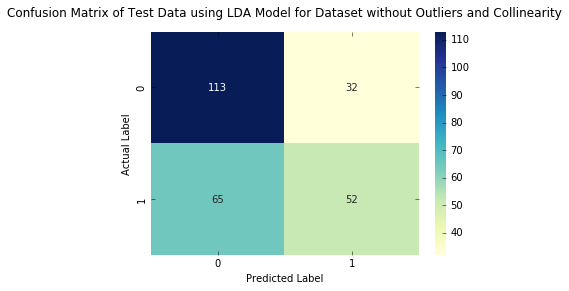

In [267]:
# Plotting the Confusion matrix on the TEST dataset for LDA model

confusion_matrix(y_test2, ytest_predict_lda2)
sns.heatmap(confusion_matrix(y_test2, ytest_predict_lda2),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data using LDA Model for Dataset without Outliers and Collinearity', pad =15)
plt.show()

In [268]:
# Classification Report of TRAIN data for Log Regression model

print(classification_report(y_train2, ytrain_predict_lr2))

              precision    recall  f1-score   support

           0       0.64      0.80      0.71       326
           1       0.67      0.48      0.56       284

    accuracy                           0.65       610
   macro avg       0.65      0.64      0.63       610
weighted avg       0.65      0.65      0.64       610



In [269]:
# Classification Report of TEST data for Log Regression model

print(classification_report(y_test2, ytest_predict_lr2))

              precision    recall  f1-score   support

           0       0.65      0.73      0.69       145
           1       0.60      0.50      0.55       117

    accuracy                           0.63       262
   macro avg       0.62      0.62      0.62       262
weighted avg       0.63      0.63      0.62       262



In [270]:
# Classification Report of TRAIN data for LDA model

print(classification_report(y_train2, ytrain_predict_lda2))

              precision    recall  f1-score   support

           0       0.63      0.83      0.71       326
           1       0.68      0.43      0.53       284

    accuracy                           0.64       610
   macro avg       0.65      0.63      0.62       610
weighted avg       0.65      0.64      0.63       610



In [271]:
# Classification Report of TEST data for LDA model

print(classification_report(y_test2, ytest_predict_lda2))

              precision    recall  f1-score   support

           0       0.63      0.78      0.70       145
           1       0.62      0.44      0.52       117

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.61       262
weighted avg       0.63      0.63      0.62       262



AUC: 0.665


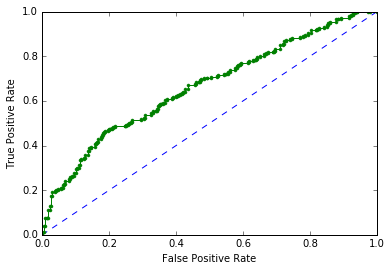

In [272]:
# AUC-ROC curve of Train data - log Regression

# predict probabilities
probs = best_model1.predict_proba(x_train2)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_train_lr1 = roc_auc_score(y_train2, probs)
print('AUC: %.3f' % auc_train_lr1)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train2, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

AUC: 0.669


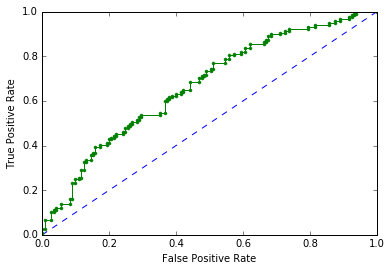

In [273]:
# AUC-ROC curve of Test data - log Regression

# predict probabilities
probs = best_model1.predict_proba(x_test2)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_test_lr1 = roc_auc_score(y_test2, probs)
print('AUC: %.3f' % auc_test_lr1)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test2, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

AUC: 0.667


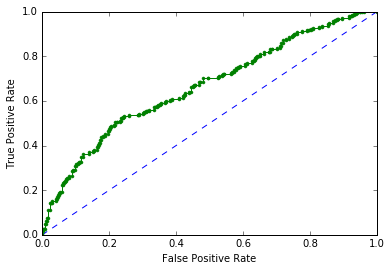

In [274]:
# AUC-ROC curve of Train data - LDA

# predict probabilities
probs = best_model_LDA1.predict_proba(x_train2)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_train_lda1 = roc_auc_score(y_train2, probs)
print('AUC: %.3f' % auc_train_lda1)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train2, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

AUC: 0.667


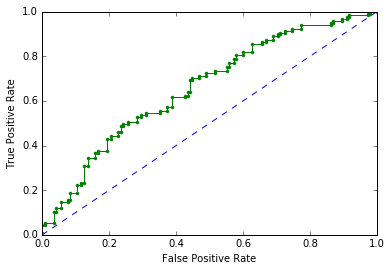

In [275]:
# AUC-ROC curve of Test data - LDA

# predict probabilities
probs = best_model_LDA1.predict_proba(x_test2)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_test_lda1 = roc_auc_score(y_test2, probs)
print('AUC: %.3f' % auc_train_lda1)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test2, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

#### Extracting the Accuracy, precision, Recall, F1 Score, AUC-ROC Score for Test and Train Data for Dataset with Outlier and Multicollinearity

In [276]:
## Extracting for the Train Data
from sklearn.metrics import precision_recall_fscore_support as score

In [277]:
precision_Train_LogReg,recall_Train_LogReg,fscore_Train_LogReg,support_Train_LogReg =score(y_train1, ytrain_predict_lr1,average='macro')

In [278]:
precision_Train_LDA,recall_Train_LDA,fscore_Train_LDA,support_Train_LDA =score(y_train1, ytrain_predict_lda1,average='macro')

In [279]:
## Extracting for the Test Data
precision_Test_LogReg,recall_Test_LogReg,fscore_Test_LogReg,support_Test_LogReg =score(y_test1, ytest_predict_lr1,average='macro')

In [280]:
precision_Test_LDA,recall_Test_LDA,fscore_Test_LDA,support_Test_LDA =score(y_test1, ytest_predict_lda1,average='macro')

In [281]:
# Creating DataFrame of Classification Report using 2 models for the Train datset with Outliers
index = ['Log_Reg', 'LDA']
column = ['Precision_Train','Recall_Train','fscore_Train','Accuracy_Train', 'AUC-ROC_Score_Train']
Class_Report_with_outlier_Train = pd.DataFrame(data = [[precision_Train_LogReg,recall_Train_LogReg,fscore_Train_LogReg,LogReg_Train_Score, auc_train_lr],
                                                      [precision_Train_LDA,recall_Train_LDA,fscore_Train_LDA,LDA_Train_Score, auc_train_lda]]
                                                      , columns = column, index= index)

In [282]:
round(Class_Report_with_outlier_Train,2)

,Precision_Train,Recall_Train,fscore_Train,Accuracy_Train,AUC-ROC_Score_Train
Log_Reg,0.68,0.67,0.67,0.68,0.74
LDA,0.67,0.66,0.66,0.67,0.74


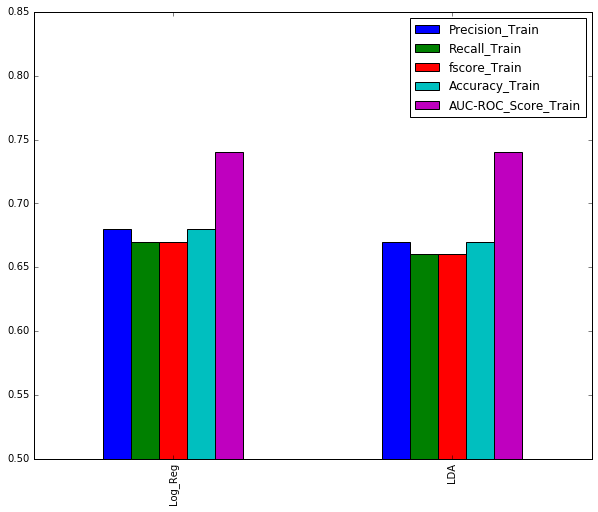

In [283]:
round(Class_Report_with_outlier_Train,2).plot(kind='bar',figsize=(10,8))
plt.ylim([0.5,0.85])
plt.legend( loc='best')

In [284]:
# Creating DataFrame of Classification Report using 2 models for the Test datset with Outliers
index = ['Log_Reg', 'LDA']
column = ['Precision_Test','Recall_Test','fscore_Test','Accuracy_Test', 'AUC-ROC_Score_Test']
Class_Report_with_outlier_Test = pd.DataFrame(data = [[precision_Test_LogReg,recall_Test_LogReg,fscore_Test_LogReg,LogReg_Test_Score, auc_test_lr],
                                                      [precision_Test_LDA,recall_Test_LDA,fscore_Test_LDA,LDA_Test_Score, auc_test_lda]]
                                                      , columns = column, index= index)

In [285]:
round(Class_Report_with_outlier_Test,2)

,Precision_Test,Recall_Test,fscore_Test,Accuracy_Test,AUC-ROC_Score_Test
Log_Reg,0.64,0.64,0.64,0.65,0.7
LDA,0.64,0.63,0.63,0.64,0.7


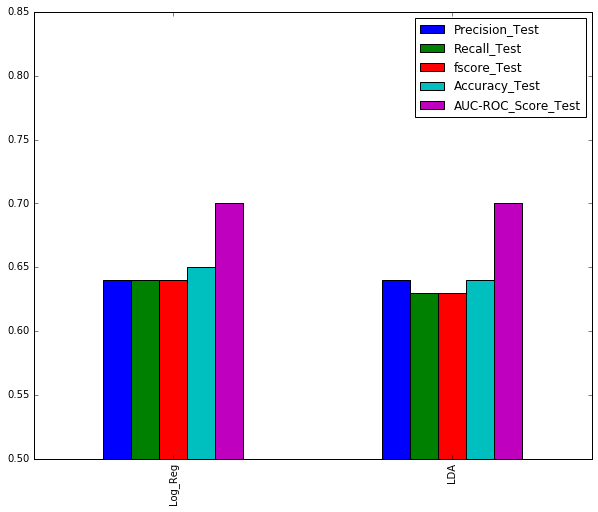

In [286]:
round(Class_Report_with_outlier_Test,2).plot(kind='bar',figsize=(10,8))
plt.ylim([0.5,0.85])
plt.legend( loc='best')

#### Extracting the Accuracy, precision, Recall, F1 Score for Test and Train Data for Dataset without Outlier and multicollinearity

In [287]:
## Extracting for the Train Data

precision_Train_LogReg1,recall_Train_LogReg1,fscore_Train_LogReg1,support_Train_LogReg1 =score(y_train2, ytrain_predict_lr2,average='macro')

In [288]:
precision_Train_LDA1,recall_Train_LDA1,fscore_Train_LDA1,support_Train_LDA1 =score(y_train2, ytrain_predict_lda2,average='macro')

In [289]:
## Extracting for the Test Data

precision_Test_LogReg1,recall_Test_LogReg1,fscore_Test_LogReg1,support_Test_LogReg1 =score(y_test2, ytest_predict_lr2,average='macro')

In [290]:
precision_Test_LDA1,recall_Test_LDA1,fscore_Test_LDA1,support_Test_LDA1 =score(y_test2, ytest_predict_lda2,average='macro')

In [291]:
# Creating DataFrame of Classification Report using 2 models for the Train datset without Outliers
index = ['Log_Reg', 'LDA']
column = ['Precision_Train_wo','Recall_Train_wo','fscore_Train_wo','Accuracy_Train_wo', 'AUC-ROC_Score_Train_wo']
Class_Report_without_outlier_Train = pd.DataFrame(data = [[precision_Train_LogReg1,recall_Train_LogReg1,fscore_Train_LogReg1,LogReg_Train_Score1, auc_train_lr1],
                                                      [precision_Train_LDA1,recall_Train_LDA1,fscore_Train_LDA1,LDA_Train_Score1, auc_train_lda1]]
                                                      , columns = column, index= index)

In [292]:
round(Class_Report_without_outlier_Train,2)

,Precision_Train_wo,Recall_Train_wo,fscore_Train_wo,Accuracy_Train_wo,AUC-ROC_Score_Train_wo
Log_Reg,0.65,0.64,0.63,0.65,0.66
LDA,0.65,0.63,0.62,0.64,0.67


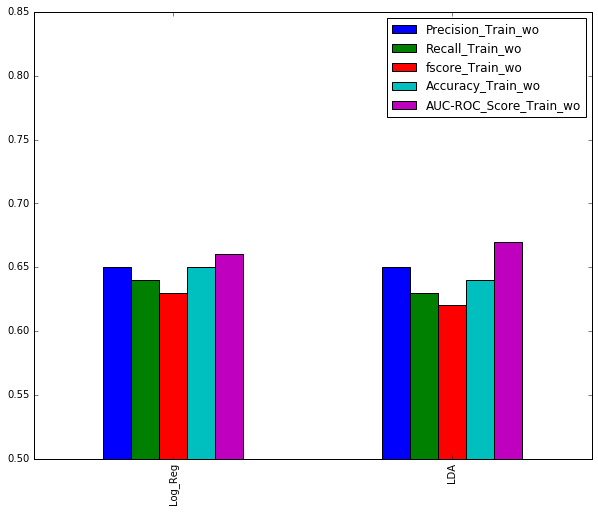

In [293]:
round(Class_Report_without_outlier_Train,2).plot(kind='bar',figsize=(10,8))
plt.ylim([0.5,0.85])
plt.legend( loc='best')

In [294]:
# Creating DataFrame of Classification Report using 2 models for the Test datset without Outliers
index = ['Log_Reg', 'LDA']
column = ['Precision_Test_wo','Recall_Test_wo','fscore_Test_wo','Accuracy_Test_wo', 'AUC-ROC_Score_Test_wo']
Class_Report_without_outlier_Test = pd.DataFrame(data = [[precision_Test_LogReg1,recall_Test_LogReg1,fscore_Test_LogReg1,LogReg_Test_Score1, auc_test_lr1],
                                                      [precision_Test_LDA1,recall_Test_LDA1,fscore_Test_LDA1,LDA_Test_Score1, auc_test_lda1]]
                                                      , columns = column, index= index)

In [295]:

round(Class_Report_without_outlier_Test,2)

,Precision_Test_wo,Recall_Test_wo,fscore_Test_wo,Accuracy_Test_wo,AUC-ROC_Score_Test_wo
Log_Reg,0.62,0.62,0.62,0.63,0.67
LDA,0.63,0.61,0.61,0.63,0.66


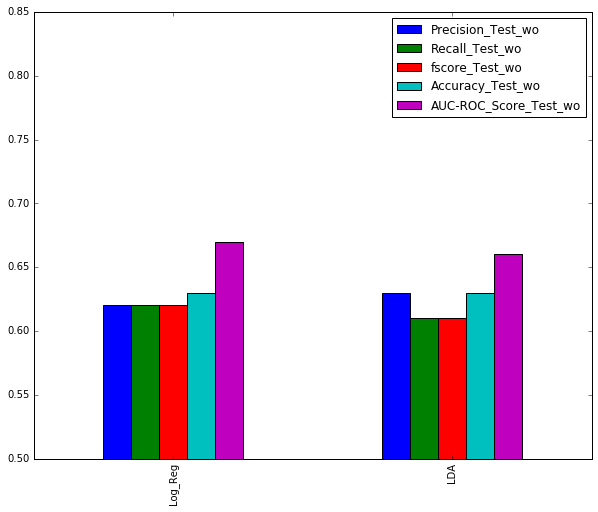

In [296]:
round(Class_Report_without_outlier_Test,2).plot(kind='bar',figsize=(10,8))
plt.ylim([0.5,0.85])
plt.legend( loc='best')

In [297]:
# From the above analysis it is seen that both the models are performing better with Outliers and collinearity
# Now the Precision, Recall is not balanced for 0 and 1, which we can try to improve by changing the probability threshold

In [298]:
# Test probability
ytest_predict_lr1_prob =best_model.predict_proba(x_test1)
ytest_predict_lda1_prob =best_model_LDA.predict_proba(x_test1)

In [299]:
ytest_predict_lr_changed_threshold = np.where(ytest_predict_lr1_prob[:,1]>0.4,1,0)
ytest_predict_lda_changed_threshold = np.where(ytest_predict_lda1_prob[:,1]>0.4,1,0)

In [300]:
# Generating the Classification report with new threshold for train and test
print('Classification report Log Regression for Test data')
print(classification_report(y_test1, ytest_predict_lr_changed_threshold))
print('======================================')
print('Classification report for LDA for Test data')
print(classification_report(y_test1, ytest_predict_lda_changed_threshold))

Classification report Log Regression for Test data
              precision    recall  f1-score   support

           0       0.77      0.57      0.66       145
           1       0.60      0.79      0.68       117

    accuracy                           0.67       262
   macro avg       0.68      0.68      0.67       262
weighted avg       0.69      0.67      0.67       262

Classification report for LDA for Test data
              precision    recall  f1-score   support

           0       0.77      0.59      0.67       145
           1       0.61      0.79      0.69       117

    accuracy                           0.68       262
   macro avg       0.69      0.69      0.68       262
weighted avg       0.70      0.68      0.68       262



#### As per all the above analysis we can have below conclusions
#### 1. Logistic Regression has performed better for the original dataset without any treatment done on Outliers and collinearity


***2.4 Inference: Basis on these predictions, what are the insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.***

In [ ]:
#Please refer to business report